Name : Cynthia Chiuri

Class : DS PT4

Phase : Phase 3

# CUSTOMER CHURN STRIA_TEL ANALYSIS

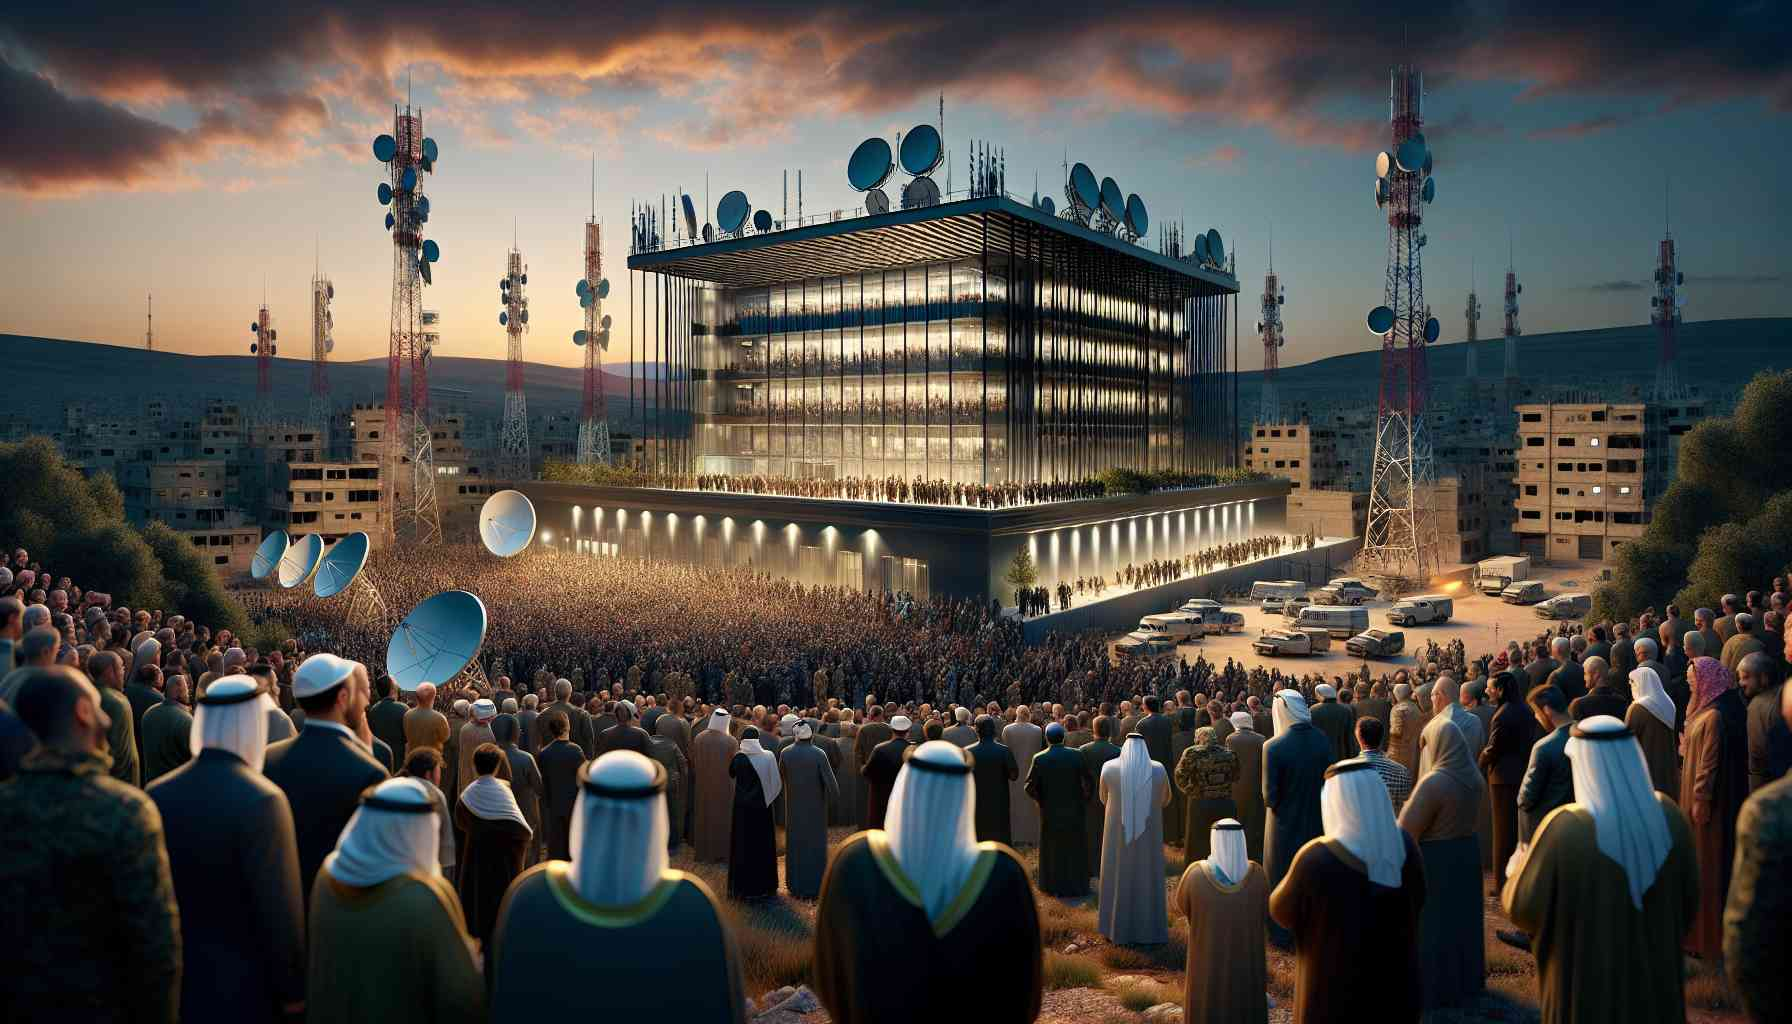



# BUSINESS UNDERSTANDING:

For the telecommunication industry, one of the most important metrics to monitor and optimize is the churn rate, which measures the percentage of customers who stop using the service within a given period. A high churn rate indicates customer dissatisfaction, loss of revenue, and reduced market share. 
Therefore, it is essential to investigate the factors that influence customer churn and develop predictive models that can identify customers who are at risk of leaving. 

Machine learning can help in this task by applying various techniques such as data preprocessing, feature engineering, model selection, evaluation, and deployment. By using machine learning, the telecommunication industry can gain insights into customer behavior, preferences, and needs, and design effective retention strategies that can improve customer loyalty and satisfaction.

Stakeholders: Syria Tel

The following business problems have been formulated for our analysis;

1.	What patterns and insights can we uncover in customer behavior that would enable early identification of customers who are likely to churn, allowing us to implement proactive interventions?

2.	Create a precise binary classification model to accurately predict customer churn and effectively reduce customer attrition?

3.	How can we assist SyriaTel in optimizing retention strategies and resource allocation to minimize financial losses associated with customer churn, ultimately improving the company's bottom line and fostering customer loyalty?

# DATA UNDERSTANDING
*Dataset used:*
DataSet Link: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/

We then made the below observation:

The dataset contains 3333 entries and 21 columns.
The columns represent various customer attributes, including state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, call durations and charges for different time periods and international calls, customer service calls, and churn status.
The dataset does not have any missing values, as indicated by the non-null counts.
The data types of the columns include bool, float64, int64, and object.
The bool column represents the churn status, indicating whether a customer discontinued the service (True) or not (False).
The float64 columns represent numerical values for call durations and charges.
The int64 columns represent numerical values for account length, area code, number of voice mail messages, call counts and customer service calls.
The object columns include state, phone number, international plan, and voice mail plan, which are categorical variables.

We then conducted an in-depth analyses and predictive modeling to tackle the issue of customer churn.


In [8]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gs
import seaborn as sns
import math
from IPython.display import Image
import warnings


from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.over_sampling import SMOTE,SMOTENC

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

# DATA LOADING AND INSPECTING

In [9]:
#loading the dataset
data = pd.read_csv('SyriaTel_customer_data.csv')
# We then create a copy of our dataset to work with
syria_df3 =  data.copy()

In [10]:
#Display the first 10 rows
syria_df3.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [11]:
# View 5 data points from the bottom
syria_df3.tail(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [12]:
syria_df3.shape

(3333, 21)

In [13]:
#Get a summary of all columns data types and details
syria_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [14]:
# Get the number of unique values
syria_df3.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

Non-Categorical Features()

account length
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
Phone number

Categorical Features()

Area code
international plan
voice mail plan

In [15]:
# Get insights about the data by getting a description
syria_df3.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


So far our data does not raise any concern so we can proceed

In [16]:
# Following our objectives,get the count of true and false in churn column
print(syria_df3.churn.value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


Checking for Missing and Duplicate Values

In [17]:
#Checking for missing and duplicate values
syria_df3.isna().sum()
syria_df3.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

<Axes: >

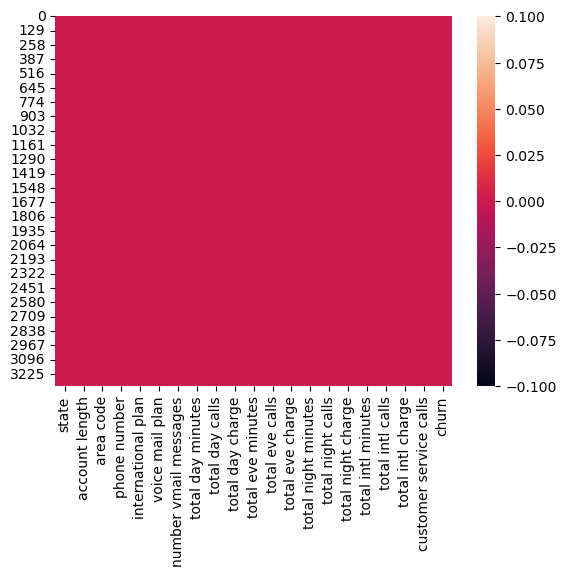

In [18]:
# Visualizing the missing values
sns.heatmap(syria_df3.isnull())

In [19]:
# Checking Duplicate Values
len(syria_df3[syria_df3.duplicated()])

0

Key Insights

Data set contains 3333 rows and 21 columns.

No missing or duplicate values for the Syria Telco dataset.

# Exploratory Data Analysis

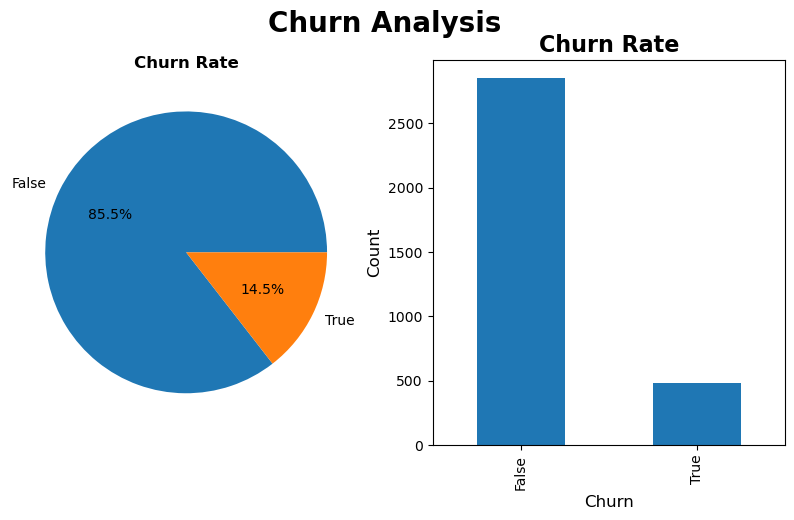

In [20]:
#Plotting a pie chart to display the false and true parameters
#Plotting a bar graph to display the counts of each 
fig, ax = plt.subplots(1, 2, figsize=(10,5))

syria_df3['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Churn Rate', fontsize=12, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

syria_df3['churn'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Churn Rate', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('Churn Analysis', fontsize=20, fontweight='bold')
plt.show()

From above, we note that there is a low churn rate of around 15%,therefore,loyalty for the Syria telco is high.

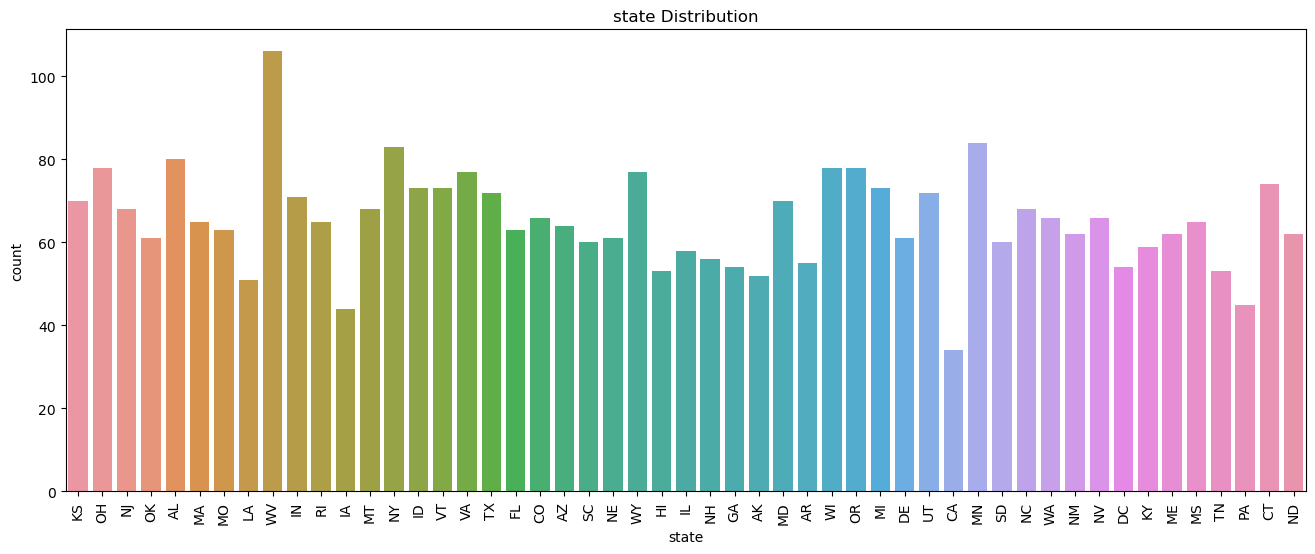

In [21]:
# Calculate value counts and plot bar plots for categorical variables
categorical_cols = ["state"]
for col in categorical_cols:
 syria_df3[col].value_counts()
 plt.figure(figsize=(16, 6))
 sns.countplot(x=col, data=syria_df3)
 plt.title(f"{col} Distribution")
 plt.xticks(rotation=90)
 plt.show()

The state with the highest count is West Virginia (WV) with 106 occurrences, indicating it is the most frequent state in the dataset. Minnesota (MN) follows closely with 84 occurrences, making it the second most common state. New York (NY) comes next with 83 occurrences, showing a similar frequency to Minnesota. Alabama (AL), Wisconsin (WI), Oregon (OR), and Ohio (OH) all have 78 occurrences, placing them among the top states in terms of frequency. The state with the lowest count is California (CA) with only 34 occurrences, suggesting it is the least frequent state in the dataset

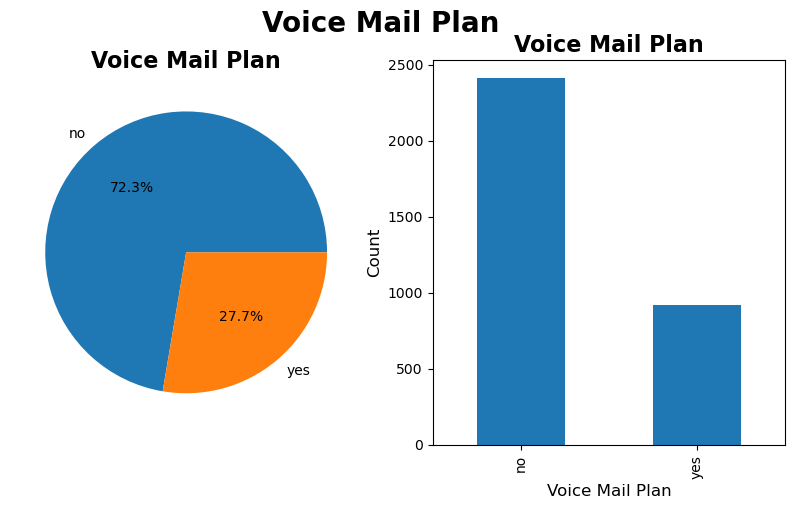

In [22]:
# Displaying the churn rate in accordance to the voice mail plan
fig, ax = plt.subplots(1, 2, figsize=(10,5))

syria_df3['voice mail plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Voice Mail Plan', fontsize=16, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

syria_df3['voice mail plan'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Voice Mail Plan', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Voice Mail Plan', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('Voice Mail Plan ', fontsize=20, fontweight='bold')
plt.show()

A customer is less likely to churn if he has a voice mail plan and we observe that the voice mail plan is only at 27.7%.

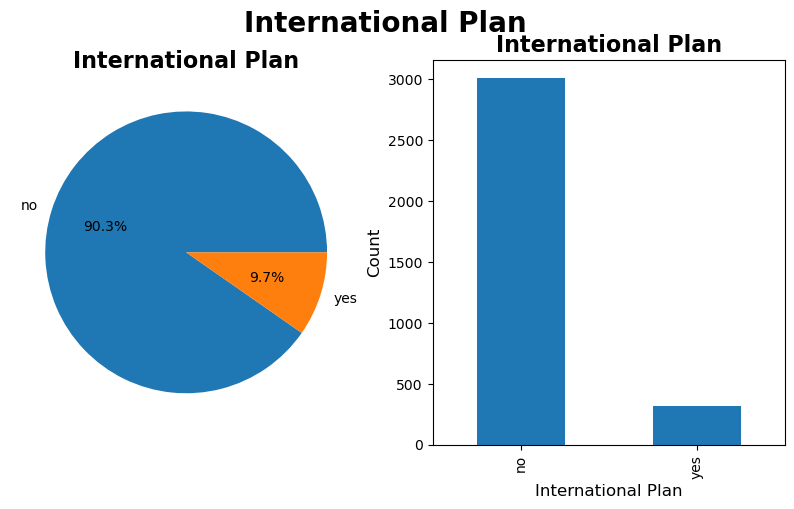

In [23]:
# Displaying the customers who are on the International Plan 
fig, ax = plt.subplots(1, 2, figsize=(10,5))

syria_df3['international plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('International Plan', fontsize=16, fontweight='bold')
ax[0].set_ylabel('') # remove the y-axis label

syria_df3['international plan'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('International Plan', fontsize=16, fontweight='bold')
ax[1].set_xlabel('International Plan', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

plt.suptitle('International Plan', fontsize=20, fontweight='bold')
plt.show()

Insights from the data indicates that International plan customers are only 9.7%.

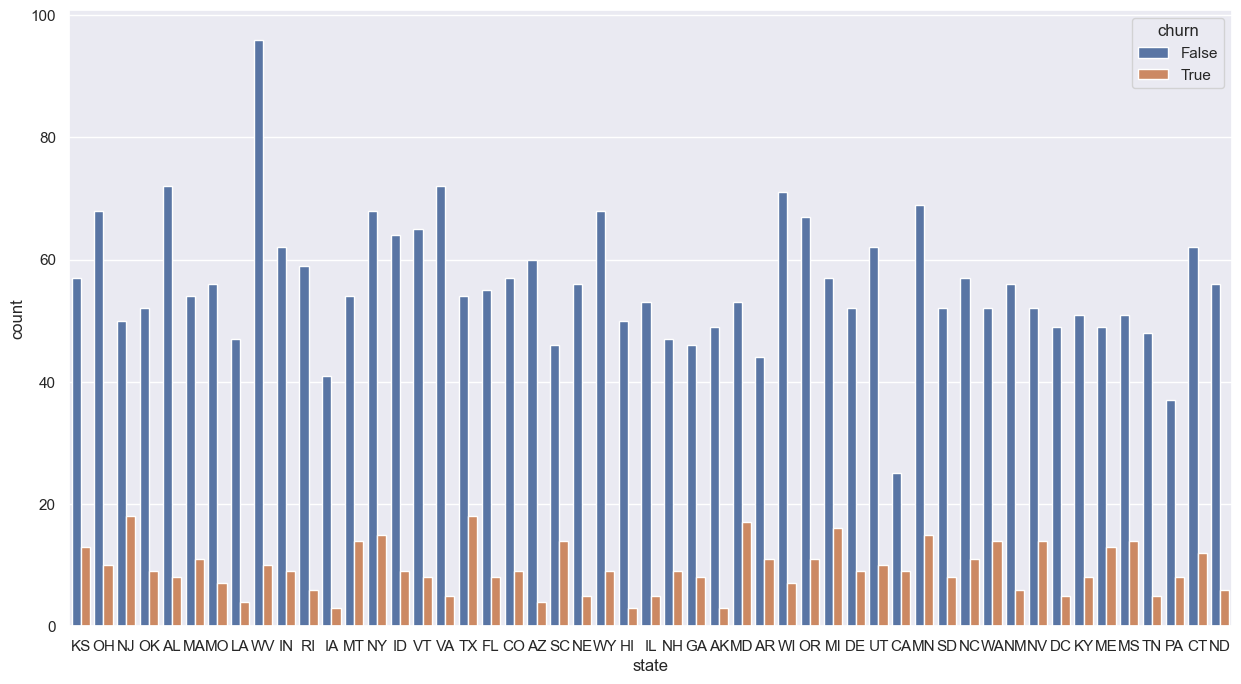

In [25]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', hue="churn", data=syria_df3)
plt.show()

The above shows different cities with different churn rates and the churn rate is low for most states.

In [27]:
#show the most chuurn state of top 10 by ascending the above list
syria_df3.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(10)

state
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: churn, dtype: float64

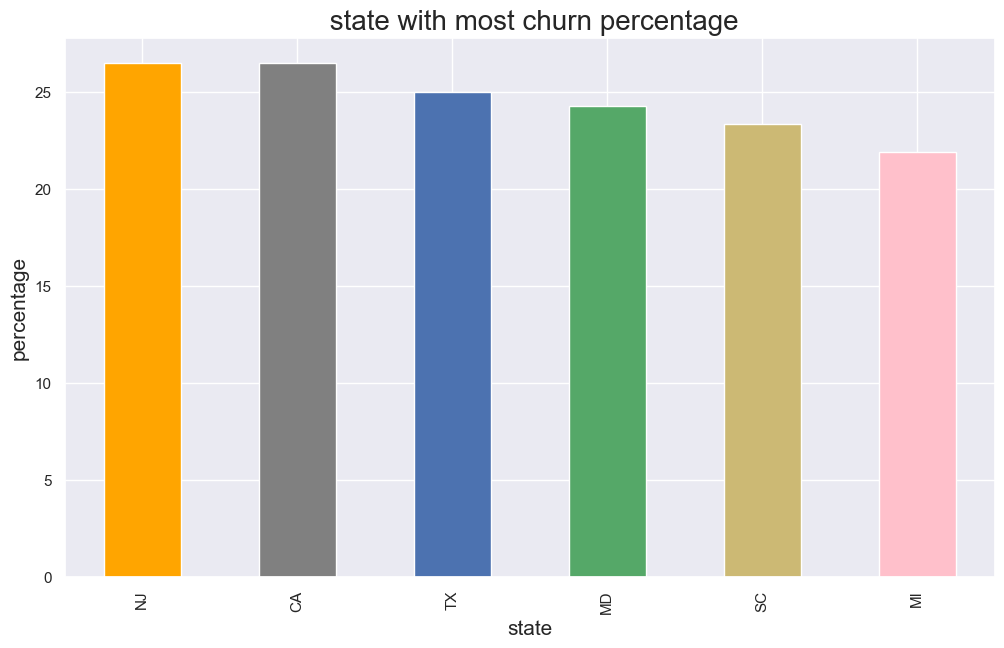

In [29]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((syria_df3.groupby(['state'])['churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['Orange','grey','b','g','y','pink','r'])
plt.title(" state with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

From the above analysis, NJ, CA, TX, MD, SC and MI states are the highest in terms of churn rate.

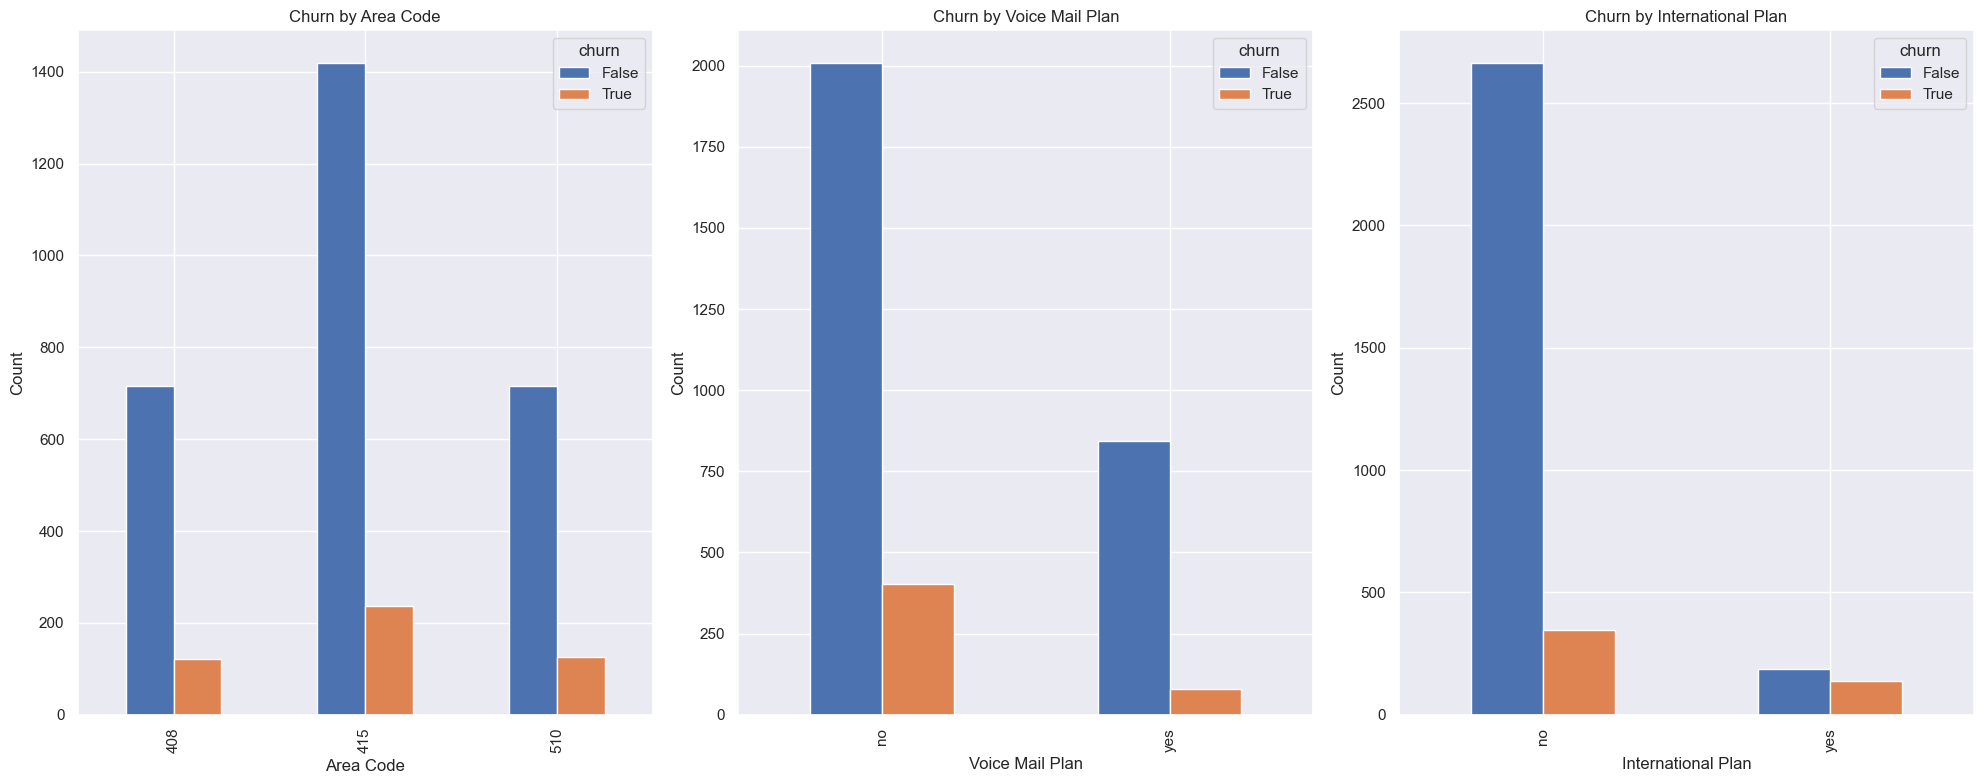

In [30]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
# Group by "area code" and "churn", then unstack and plot
syria_df3.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')
# Group by "voice mail plan" and "churn", then unstack and plot
syria_df3.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')
# Group by "international plan" and "churn", then unstack and plot
syria_df3.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')
# Adjust the layout and spacing
plt.tight_layout()
plt.show()

Churn rates vary between the different area codes, with area code 415 having the highest churn rate and area code 408 having the lowest churn rate Customers without a voice mail plan had a higher churn rate compared to customers with a voice mail plan Customers without an international plan had a higher churn rate compared to customers with an international plan

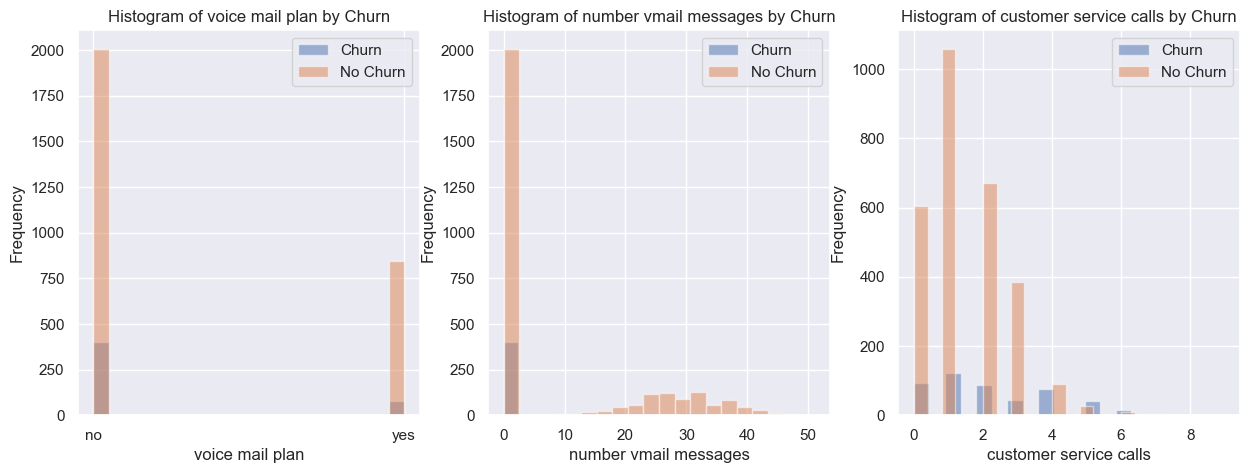

In [32]:
#Plotting the churn rate against 'voice mail plan','number of vmail messages' and 'customer services calls' from the dataset
cols = ['voice mail plan', 'number vmail messages', 'customer service calls']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(syria_df3[syria_df3['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(syria_df3[syria_df3['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

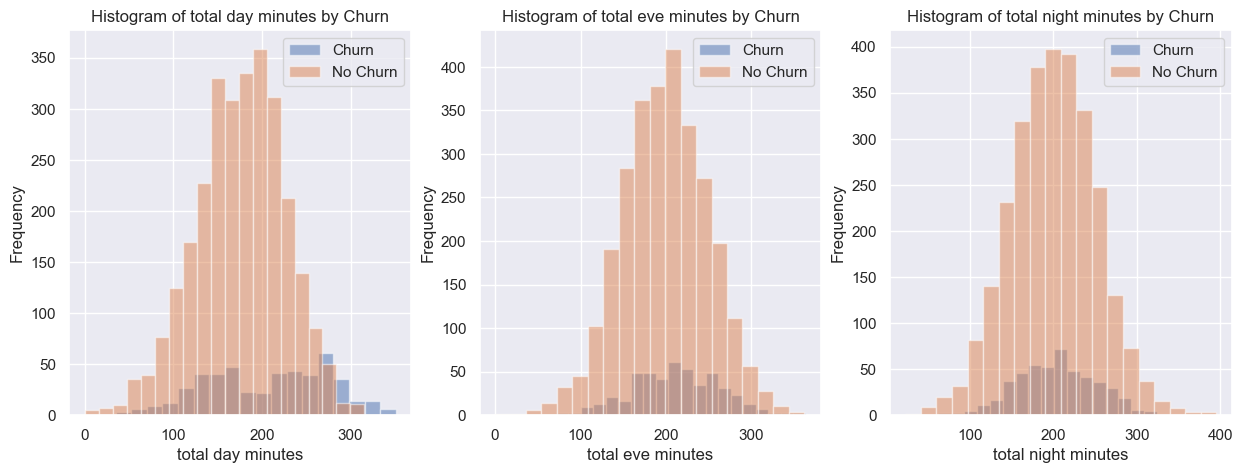

In [33]:
#Plotting churn rate against 'total day minutes', 'total evening minutes' and 'total night minutes'
cols = ['total day minutes', 'total eve minutes', 'total night minutes']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(syria_df3[syria_df3['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(syria_df3[syria_df3['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

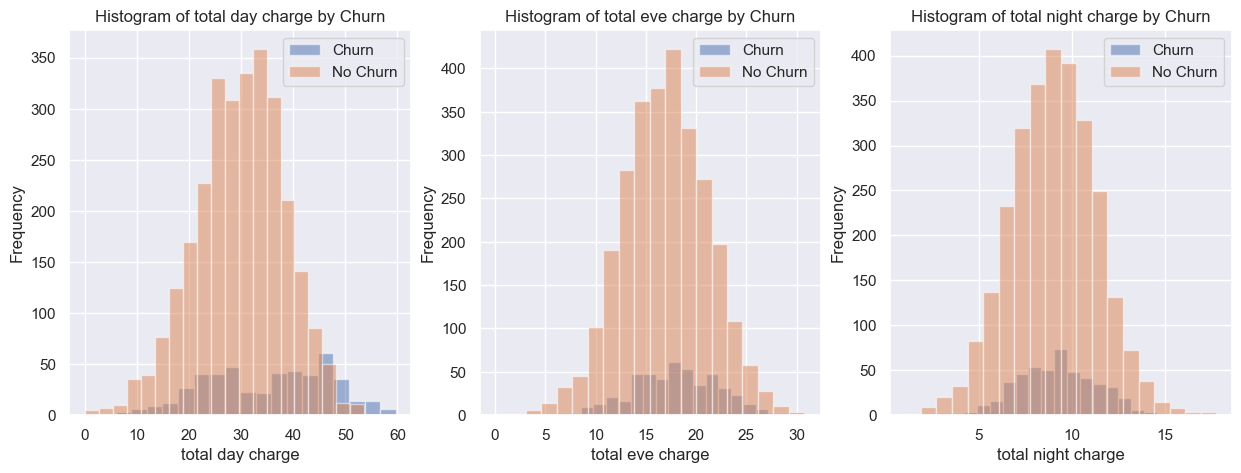

In [34]:
# Plotting the churn rate against 'total day charge','total evening charge' and 'total night charge'
cols = ['total day charge', 'total eve charge', 'total night charge']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(syria_df3[syria_df3['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(syria_df3[syria_df3['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

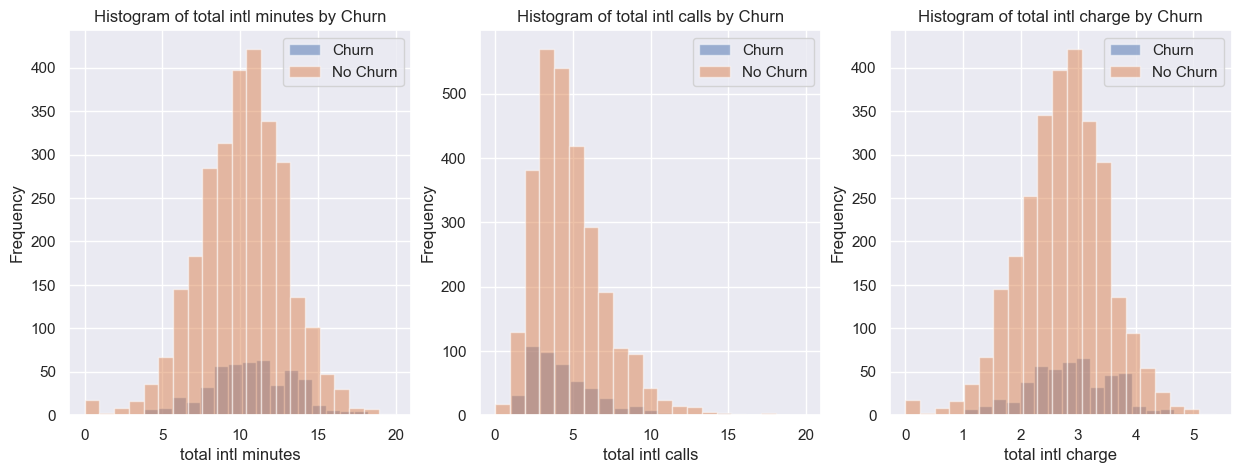

In [35]:
# Plotting the churn rate against 'total intl minutes','total intl calls' and 'total intl charge'
cols = ['total intl minutes', 'total intl calls', 'total intl charge']
fig, axs = plt.subplots(1, len(cols), figsize=(15, 5))
for i, col in enumerate(cols):
    axs[i].hist(syria_df3[syria_df3['churn'] == 1][col], bins=20, alpha=0.5, label='Churn')
    axs[i].hist(syria_df3[syria_df3['churn'] == 0][col], bins=20, alpha=0.5, label='No Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col} by Churn')
    axs[i].legend(loc='upper right')
plt.show()

From the above analysis, we note that,

The churn rate across the board was very minimal against the said variables as the minutes increased during the day towards the evening and in the nighttime.
According to the visual above the churn rate is at an ultimately low as as the number of calls increase throughout the day, evening and night. There is a high 'no churn' rate.
The customers who had no voicemail plan ended up having a higher churn rate as compared to those who had subscribed to having a voicemail plan.
The chances of the customers churning are higher when you have less vmail messages as compared to having more vmail messages.
The less number of customer service calls made to the telecom company the higher the churn rate of customers.

# Data Preparation and Cleaning 

We will carry out our data preparation such as :

Data Type conversion.
Removing outliers.
Normalizing our dataset.
Dealing with multicolinearity.
Spliting the data.

In [36]:
# Converting the strings in International plan and Voicemail plan into integers 
syria_df3['international plan'] = syria_df3['international plan'].map({'yes': 1, 'no': 0})
syria_df3['voice mail plan'] = syria_df3['voice mail plan'].map({'yes': 1, 'no': 0})

In [37]:
# Converting phone number to integer and replacing the - 
syria_df3['phone number'] = syria_df3['phone number'].str.replace('-', '').astype(int)

In [38]:
# Confirming the convertions
syria_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   int32  
 4   international plan      3333 non-null   int64  
 5   voice mail plan         3333 non-null   int64  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [39]:
#We drop the state column to avouid model complications with many columns
syria_df3 = syria_df3.drop('state',axis=1)

In [40]:
# Confirming the convertions
syria_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   int32  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

# Removing Outliers

Column "account length" has 18 outlier(s):
197     208
238     215
309     209
416     224
817     243
1045    217
1093    210
1387    212
1408    232
1551    225
1751    225
1886    224
2150    212
2259    210
2277    217
2700    209
3216    221
3227    209
Name: account length, dtype: int64
Outliers in column "account length" have been dropped.


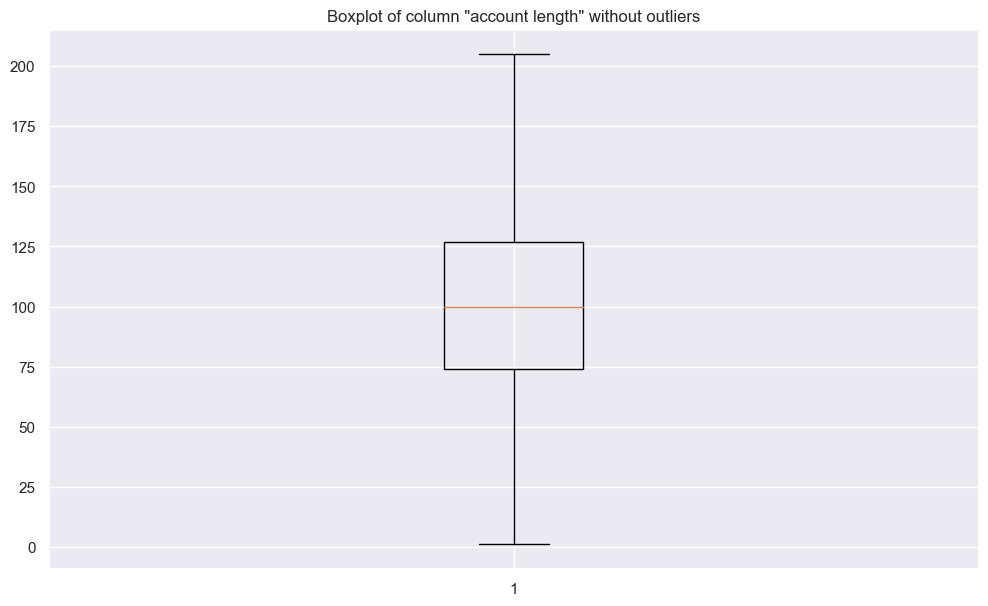

Column "area code" has no outliers.
Column "phone number" has no outliers.
Column "international plan" has 322 outlier(s):
3       1
4       1
5       1
7       1
9       1
       ..
3304    1
3309    1
3317    1
3320    1
3331    1
Name: international plan, Length: 322, dtype: int64
Outliers in column "international plan" have been dropped.


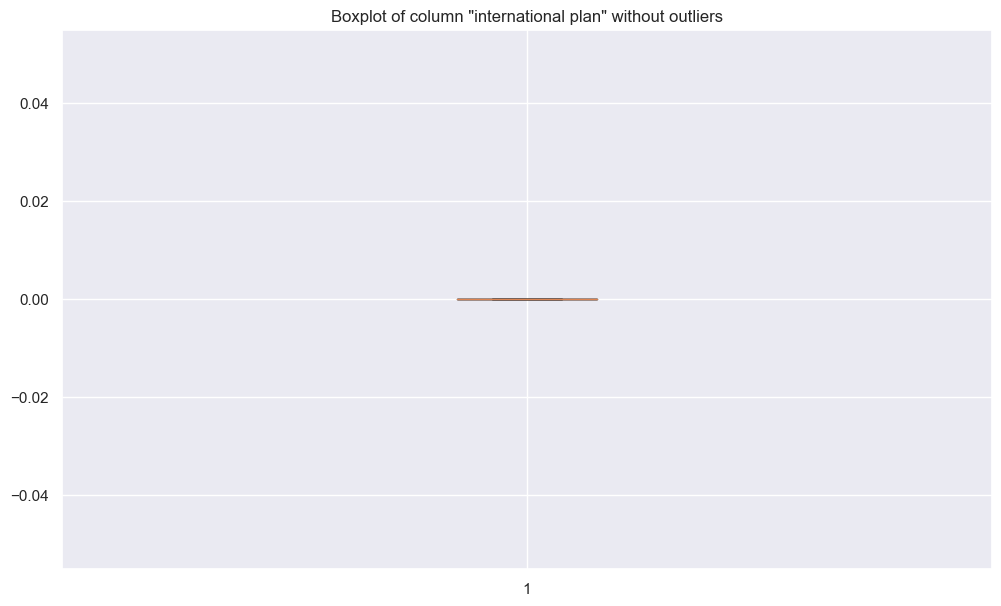

Column "voice mail plan" has no outliers.
Column "number vmail messages" has 1 outlier(s):
845    51
Name: number vmail messages, dtype: int64
Outliers in column "number vmail messages" have been dropped.


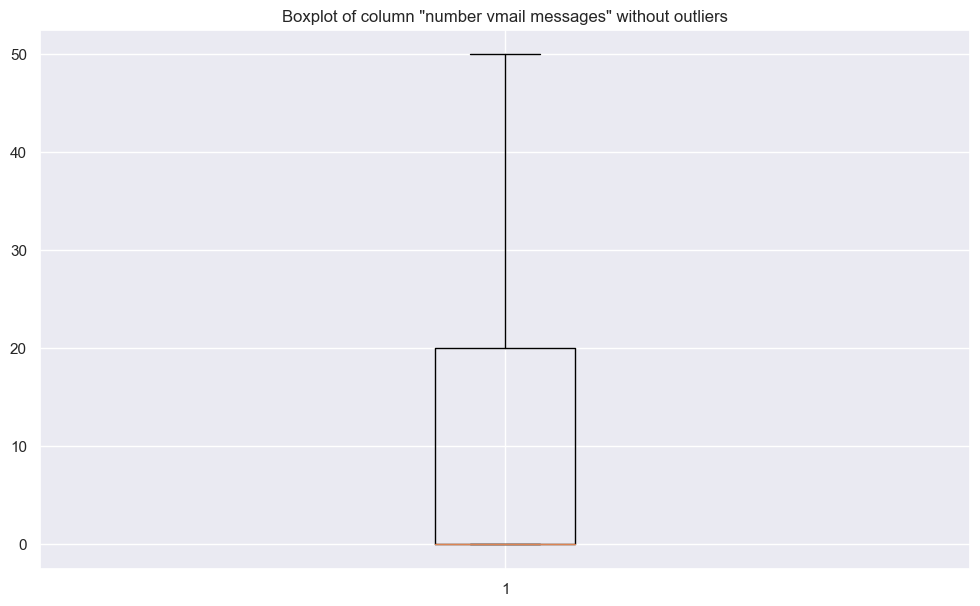

Column "total day minutes" has 27 outlier(s):
15      332.9
156     337.4
365     350.8
605     335.5
685      30.9
741      34.0
832     322.5
975     334.3
1076     25.9
1078    322.3
1130     35.1
1345      0.0
1397      0.0
1621     19.5
1679    329.8
1986      7.9
2028    328.1
2124     27.0
2252     17.6
2412    326.3
2629    322.4
2736      2.6
2753      7.8
2824    324.7
3046     18.9
3132    322.3
3174     29.9
Name: total day minutes, dtype: float64
Outliers in column "total day minutes" have been dropped.


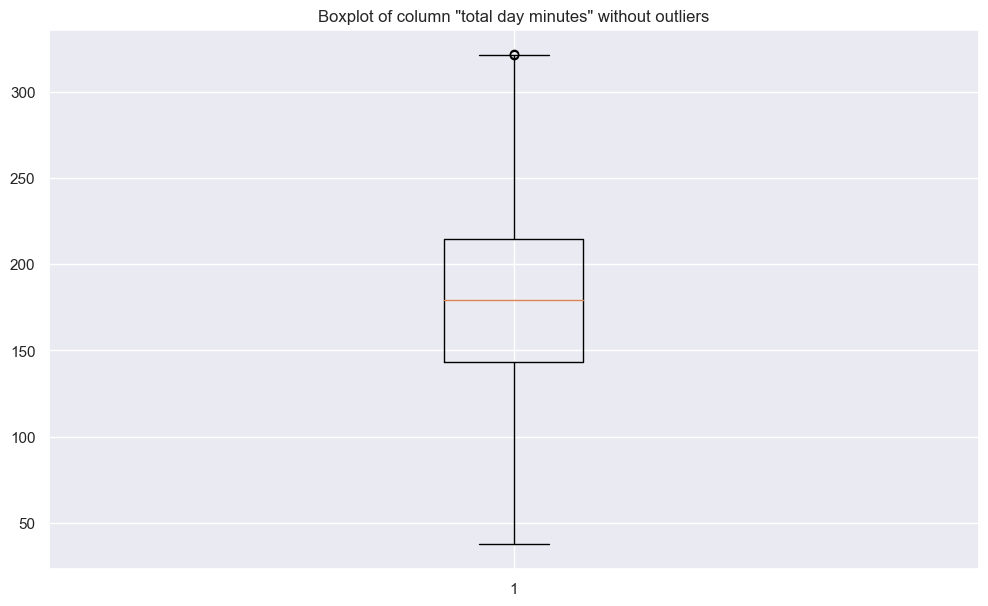

Column "total day calls" has 23 outlier(s):
143      47
315     158
415      47
468     163
692      36
740      40
1057    158
1121    165
1144     30
1273     48
1422     45
1460    160
1727     48
1869    156
1989     35
2217     42
2392    158
2394    157
2492     45
2884     44
2885     44
2964     44
3187     40
Name: total day calls, dtype: int64
Outliers in column "total day calls" have been dropped.


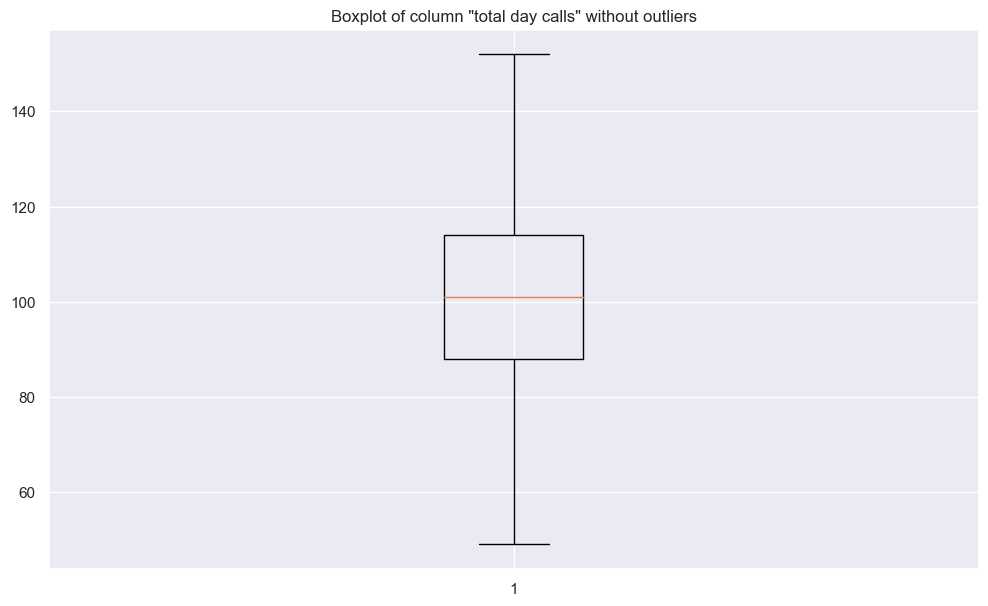

Column "total day charge" has 3 outlier(s):
901     54.67
1334    54.62
3322    54.59
Name: total day charge, dtype: float64
Outliers in column "total day charge" have been dropped.


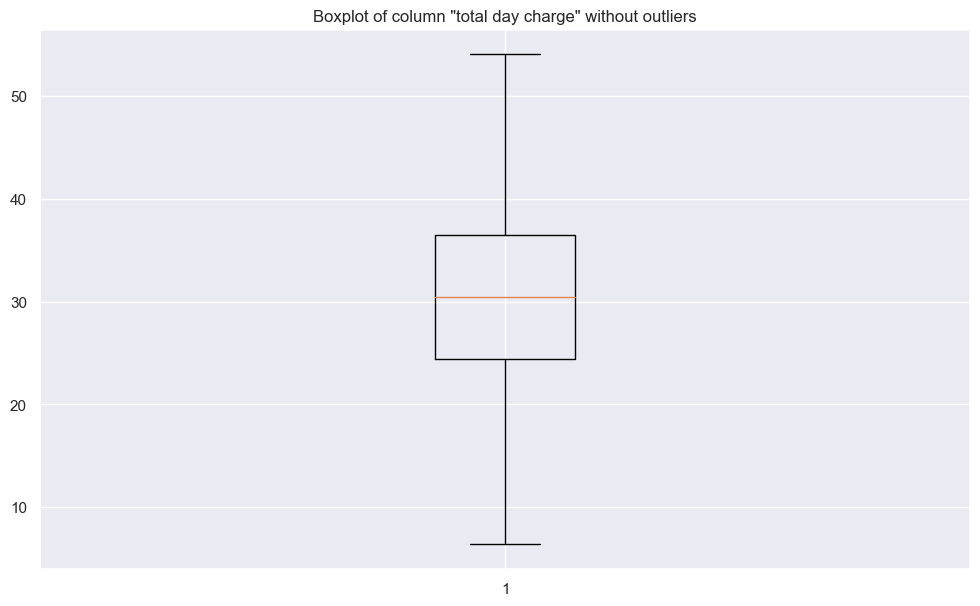

Column "total eve minutes" has 19 outlier(s):
6       348.5
8       351.6
32       31.2
302     350.5
533      42.2
580     347.3
587      58.9
821      43.9
850      52.9
889      42.5
1054     58.6
1190     56.0
1233     48.1
1335     60.0
1960     49.2
2331    361.8
2551    354.2
2932      0.0
3075    341.3
Name: total eve minutes, dtype: float64
Outliers in column "total eve minutes" have been dropped.


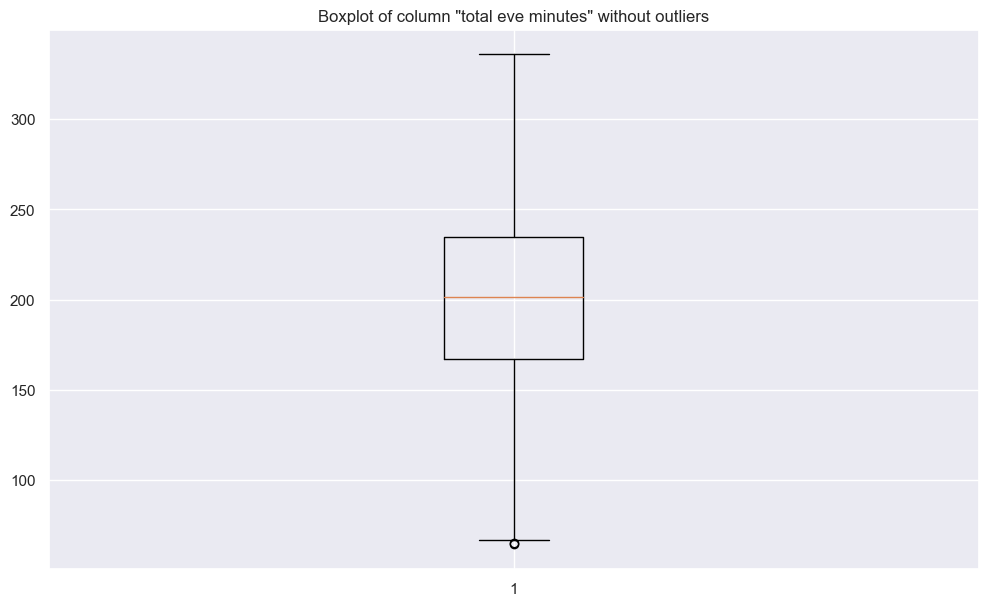

Column "total eve calls" has 18 outlier(s):
58      164
154      46
301     168
475      42
646      37
960      12
1020    157
1071    155
1266     45
1615     36
1706    156
1730     46
1856     44
2227    155
2592     46
2853     43
3121    155
3219    170
Name: total eve calls, dtype: int64
Outliers in column "total eve calls" have been dropped.


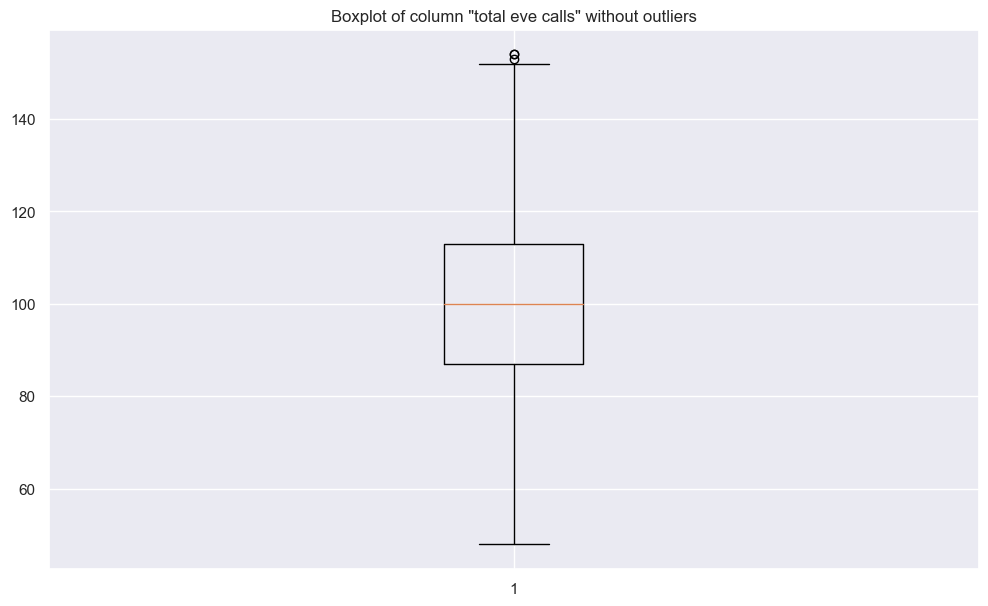

Column "total eve charge" has 2 outlier(s):
186     5.47
1906    5.54
Name: total eve charge, dtype: float64
Outliers in column "total eve charge" have been dropped.


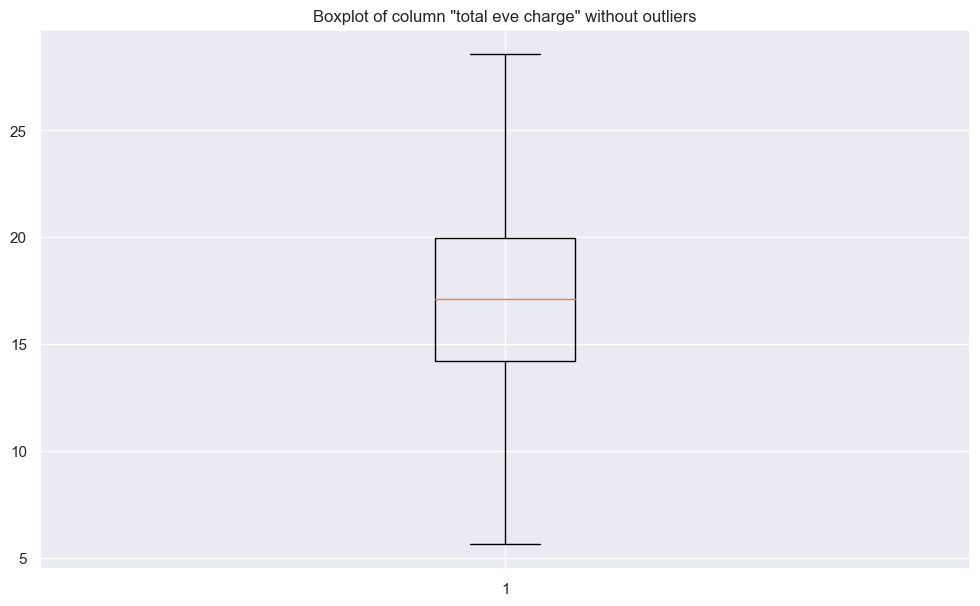

Column "total night minutes" has 29 outlier(s):
116      57.5
244     354.9
862     345.8
883      45.0
918     342.8
922     364.3
992      63.3
999      54.5
1072     50.1
1113     43.7
1202    349.7
1260     23.2
1313     63.6
1317    381.9
1445    377.5
1512     65.7
2321    367.7
2350     56.6
2382     54.0
2452     64.2
2609    344.3
2663    395.0
2754    350.2
2756     50.1
3024     53.3
3060    352.2
3107    364.9
3159     61.4
3247     47.4
Name: total night minutes, dtype: float64
Outliers in column "total night minutes" have been dropped.


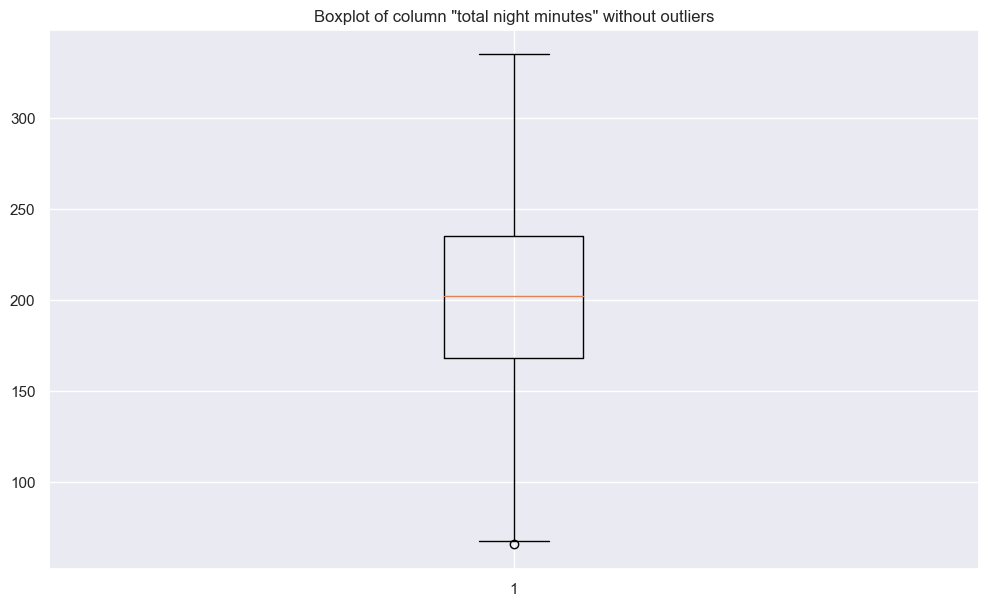

Column "total night calls" has 18 outlier(s):
326      42
335      44
395      42
429     153
493     175
1109    155
1200    157
1296    157
1748    154
1810    153
2288    166
2659     33
2728    155
2903     38
2988     36
3172    156
3211    164
3234    153
Name: total night calls, dtype: int64
Outliers in column "total night calls" have been dropped.


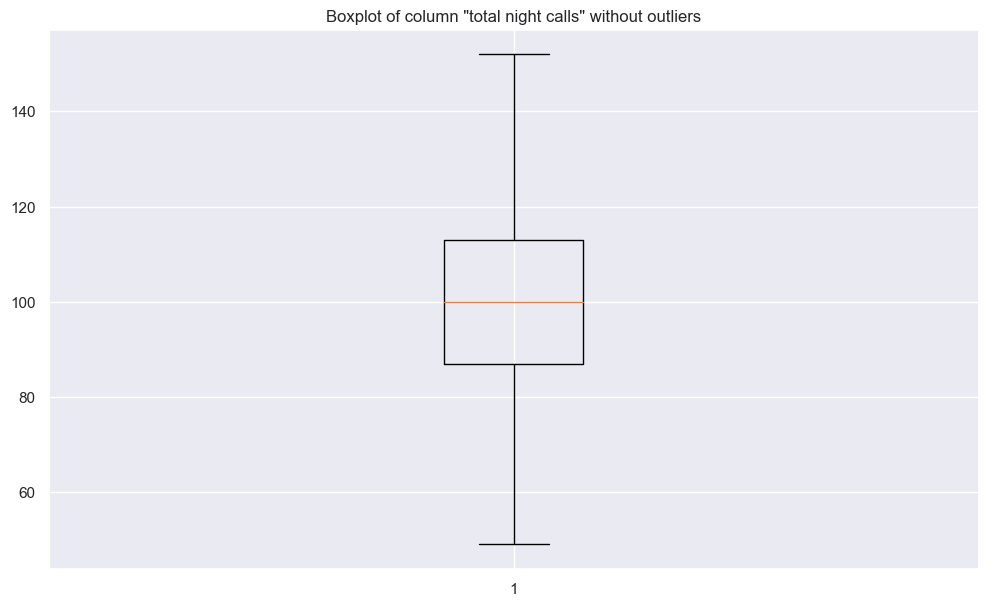

Column "total night charge" has 1 outlier(s):
835    2.96
Name: total night charge, dtype: float64
Outliers in column "total night charge" have been dropped.


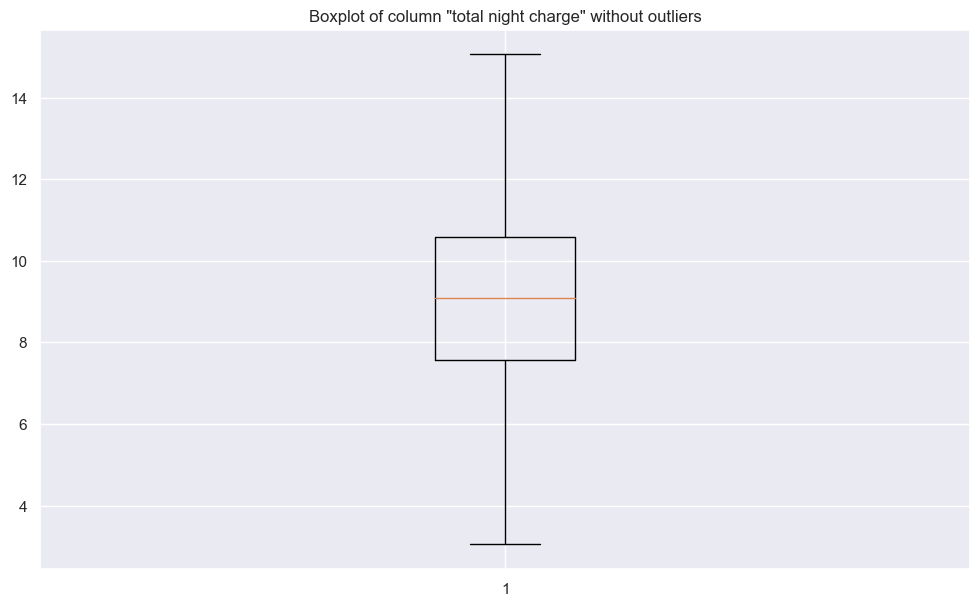

Column "total intl minutes" has 39 outlier(s):
179      0.0
225      2.7
314     18.9
343      0.0
367     18.0
397      2.0
488      0.0
535     18.2
595      0.0
712      0.0
878      0.0
1028     0.0
1080     0.0
1099     2.2
1257    18.0
1400     0.0
1564     0.0
1816    18.4
1966     2.0
2004    17.8
2180     2.9
2197     3.1
2229    17.6
2256     2.6
2345     0.0
2362     0.0
2371    18.2
2513     0.0
2534    18.0
2669     1.1
2733     0.0
2816    18.3
2906     0.0
2918     0.0
3022     2.9
3160     2.1
3275     0.0
3290     0.0
3307    17.8
Name: total intl minutes, dtype: float64
Outliers in column "total intl minutes" have been dropped.


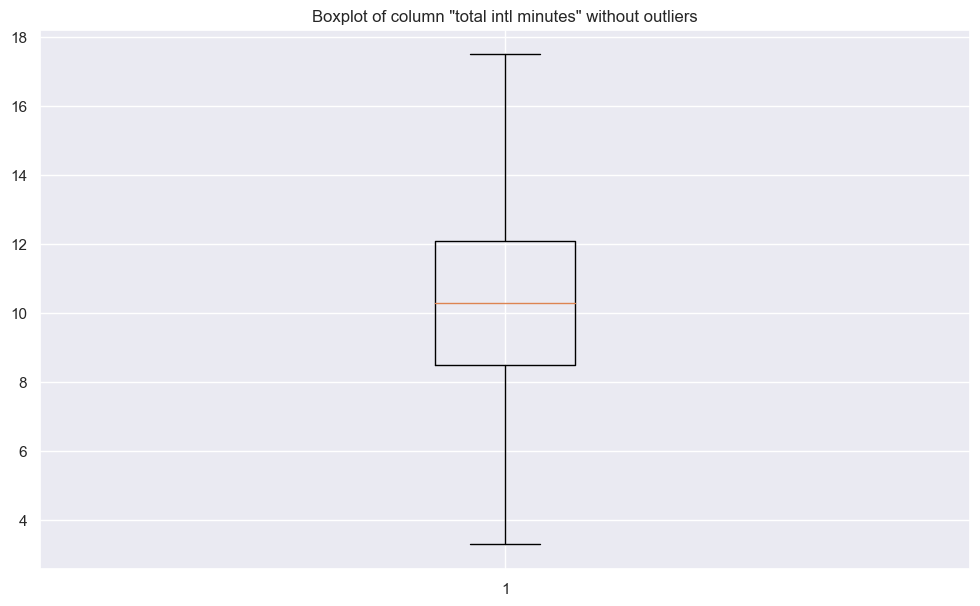

Column "total intl calls" has 68 outlier(s):
22      19
153     11
182     12
185     13
219     12
        ..
3097    11
3128    11
3206    13
3230    14
3310    17
Name: total intl calls, Length: 68, dtype: int64
Outliers in column "total intl calls" have been dropped.


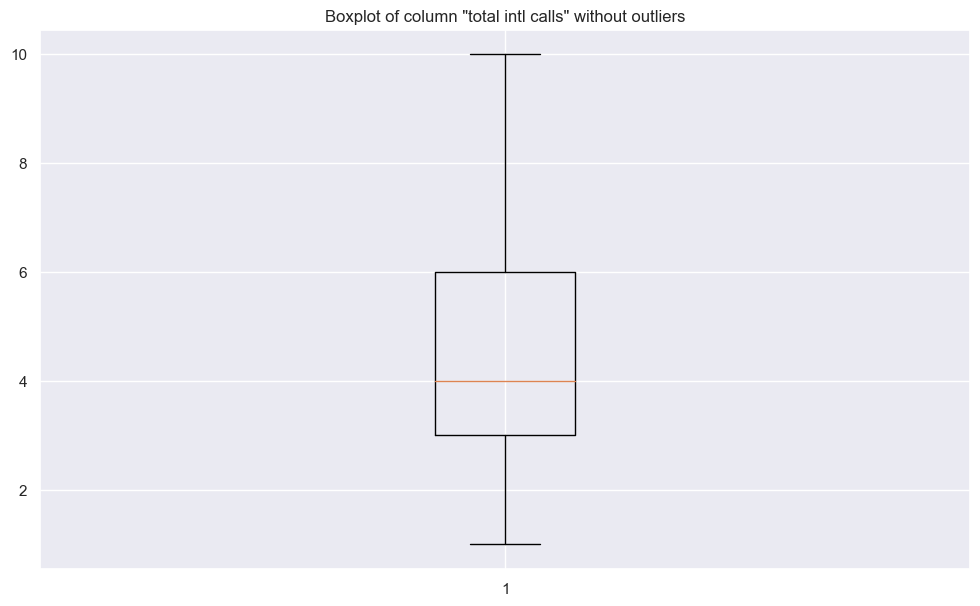

Column "total intl charge" has 2 outlier(s):
515     4.73
3080    4.73
Name: total intl charge, dtype: float64
Outliers in column "total intl charge" have been dropped.


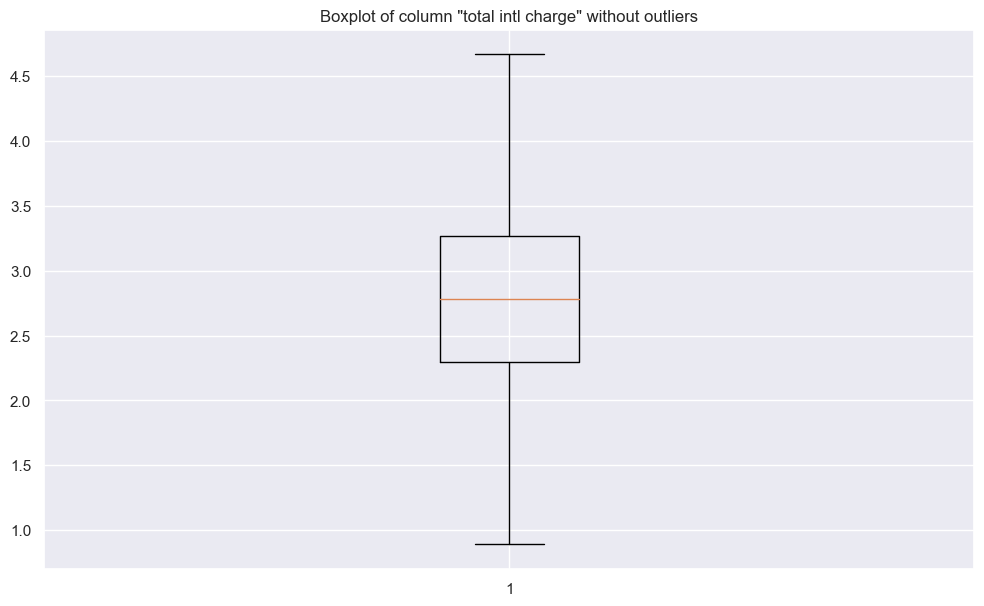

Column "customer service calls" has 221 outlier(s):
10      4
14      4
21      5
48      5
54      5
       ..
3190    6
3228    5
3280    4
3287    4
3323    5
Name: customer service calls, Length: 221, dtype: int64
Outliers in column "customer service calls" have been dropped.


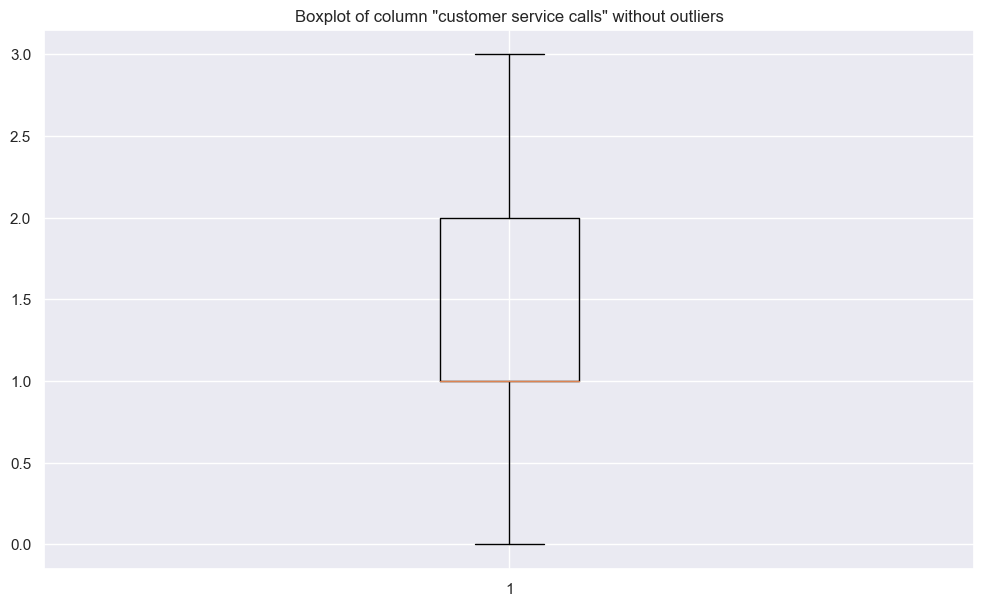

In [41]:
# Define a function to identify outliers using IQR method
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Loop over each column in the Dataframe and detect outliers
for col in syria_df3.columns:
    if np.issubdtype(syria_df3[col].dtype, np.number):
        outliers = detect_outliers_IQR(syria_df3[col])
        if outliers.any():
            print(f'Column "{col}" has {outliers.sum()} outlier(s):\n{syria_df3[col][outliers]}')
            # drop the outliers
            syria_df3 = syria_df3[~outliers]
            print(f'Outliers in column "{col}" have been dropped.')
            # plot the boxplot of the column without outliers
            fig, ax = plt.subplots()
            ax.boxplot(syria_df3[col])
            ax.set_title(f'Boxplot of column "{col}" without outliers')
            plt.show()
        else:
            print(f'Column "{col}" has no outliers.')

# Dealing with Multicollinearity

In [42]:
syria_df3.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,3824657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,3717191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,3581921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
11,74,415,3449403,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False
12,168,408,3631107,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False


In [43]:
#We One-hot encode our data since it contains non- numerical columns and would like to include them in the correlation computation.

# Define numerical and categorical features
num_features = ['account length','phone number', 'number vmail messages', 'total day minutes', 'total day calls', 
                'total day charge','total eve minutes', 'total eve calls','total eve charge','total night minutes',
                'total night calls','total night charge','total intl minutes','total intl calls','total intl charge',
                'customer service calls']

cat_features = ['area code', 'international plan', 'voice mail plan']

# Scale numerical features
scaler = StandardScaler()
syria_df3[num_features] = scaler.fit_transform(syria_df3[num_features])

# One-hot encode categorical features
syria_df3 = pd.get_dummies(syria_df3, columns=cat_features, drop_first=True)

In [44]:
#Identifying the variables that are highly correlated
highly_correlated_variables_df = (
    syria_df3
    .corr()
    .abs()
    .stack()
    .reset_index()
    .sort_values(0, ascending=False)
)

highly_correlated_variables_df['variable_pairs'] = list(zip(highly_correlated_variables_df.level_0, highly_correlated_variables_df.level_1))
highly_correlated_variables_df = highly_correlated_variables_df.set_index('variable_pairs').drop(columns=['level_1', 'level_0'])
highly_correlated_variables_df.columns = ['correlation_coefficient']
highly_correlated_variables_df = highly_correlated_variables_df.drop_duplicates()

filter_condition = (highly_correlated_variables_df.correlation_coefficient > 0.75) & (highly_correlated_variables_df.correlation_coefficient < 1)
highly_correlated_variables_df[filter_condition]

,correlation_coefficient
variable_pairs,
"(total day charge, total day minutes)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999992
"(number vmail messages, voice mail plan_1)",0.956744


Looking at this there is high colinearity among the following columns 'total day minutes', 'total day charge', 'total eve minutes','total eve charge', 'total night minutes', 'total night charge', 'total intl charge', 'total intl minutes'.

Multicolinearity can lead to unstable or biased estimates of the model coefficients, and reduce the model's ability to generalize to new data.

In [45]:
#Removing the highly correlated columns in order to reduce collinear features.
syria_df3.drop(columns=['total day charge','total eve charge','total night charge','total intl charge'], inplace=True)

In [47]:
#Verifying the drop of columns 
#Get the column names
column_names = syria_df3.columns.tolist()

#Print the column names
print(column_names)

['account length', 'phone number', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls', 'churn', 'area code_415', 'area code_510', 'voice mail plan_1']


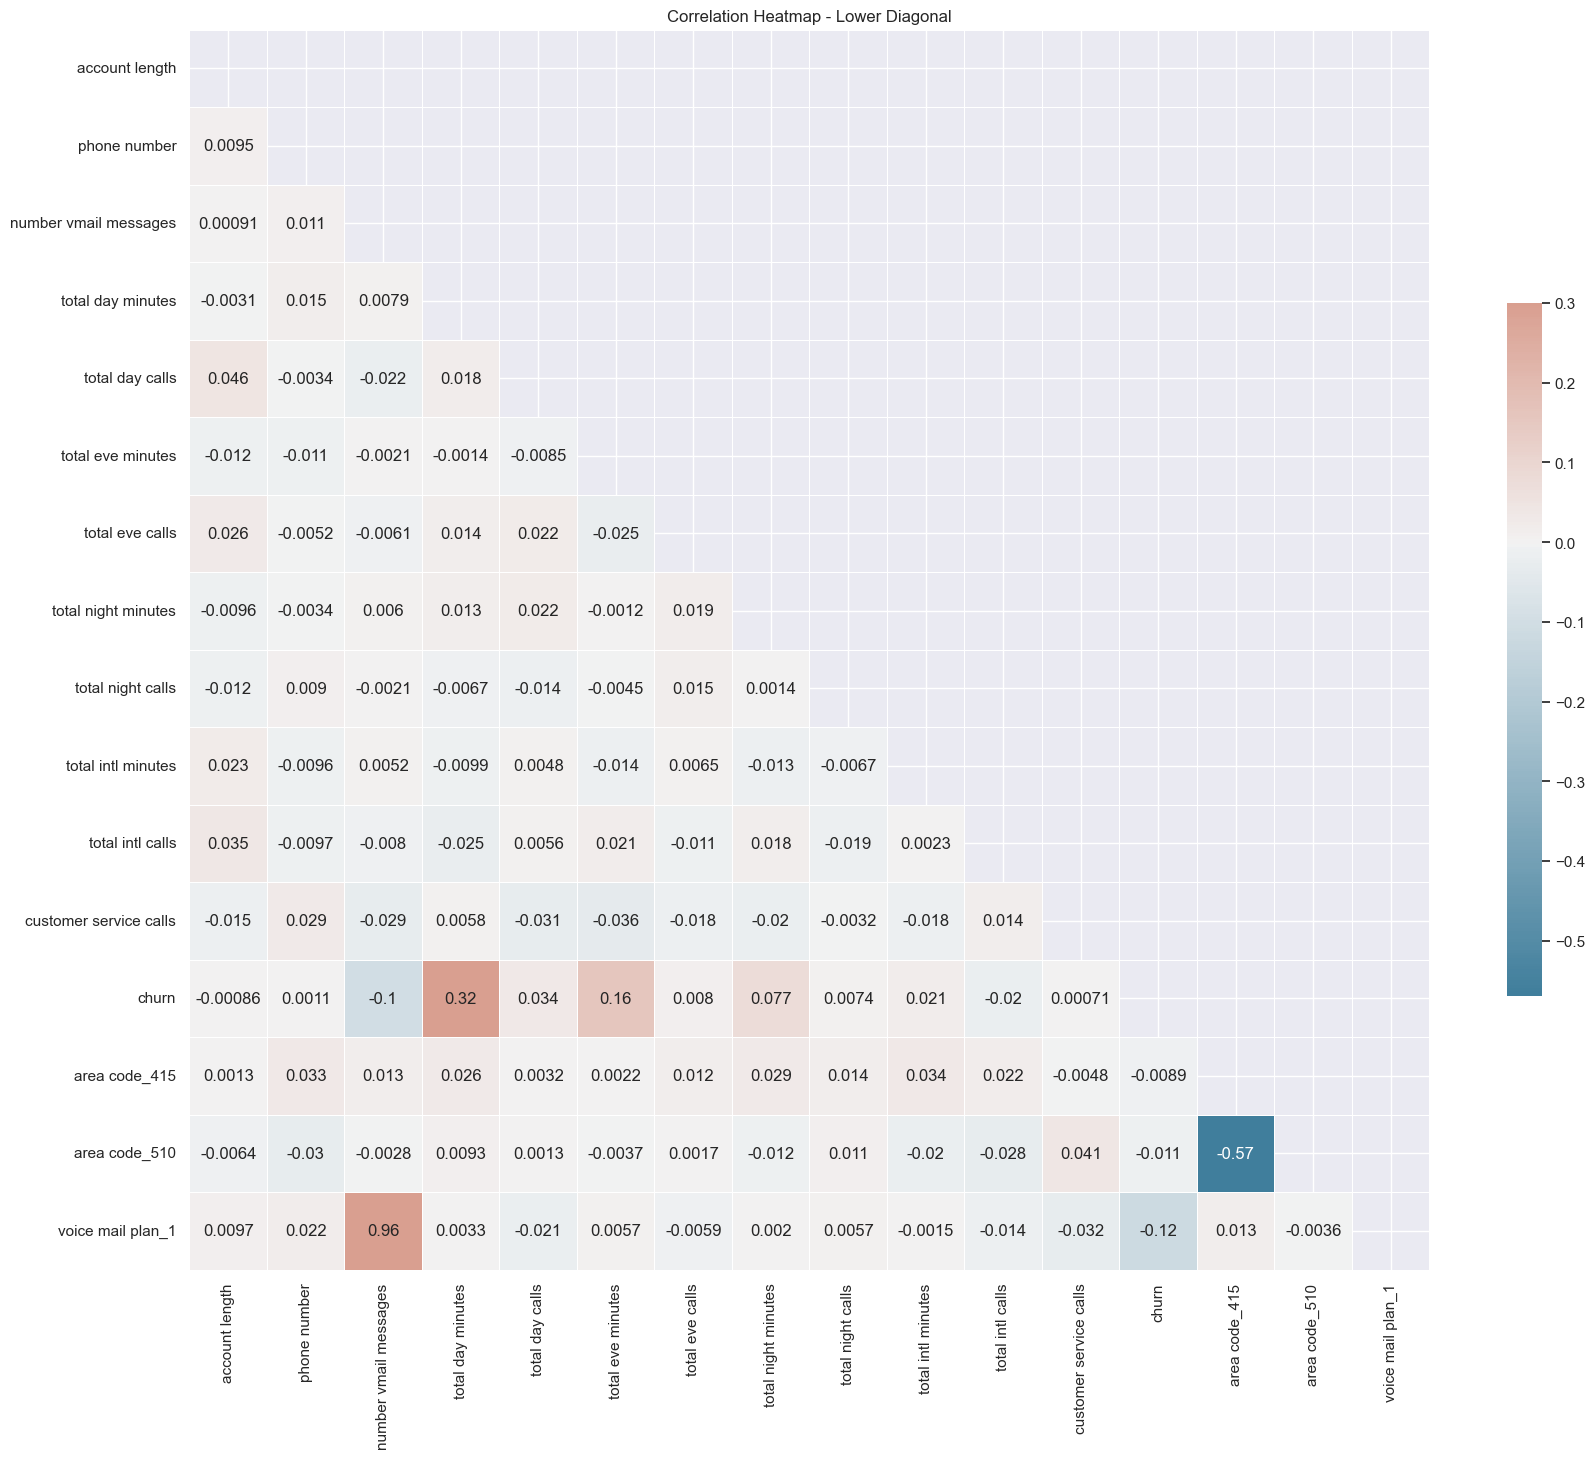

In [48]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(syria_df3.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(syria_df3.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show()

# Normalization

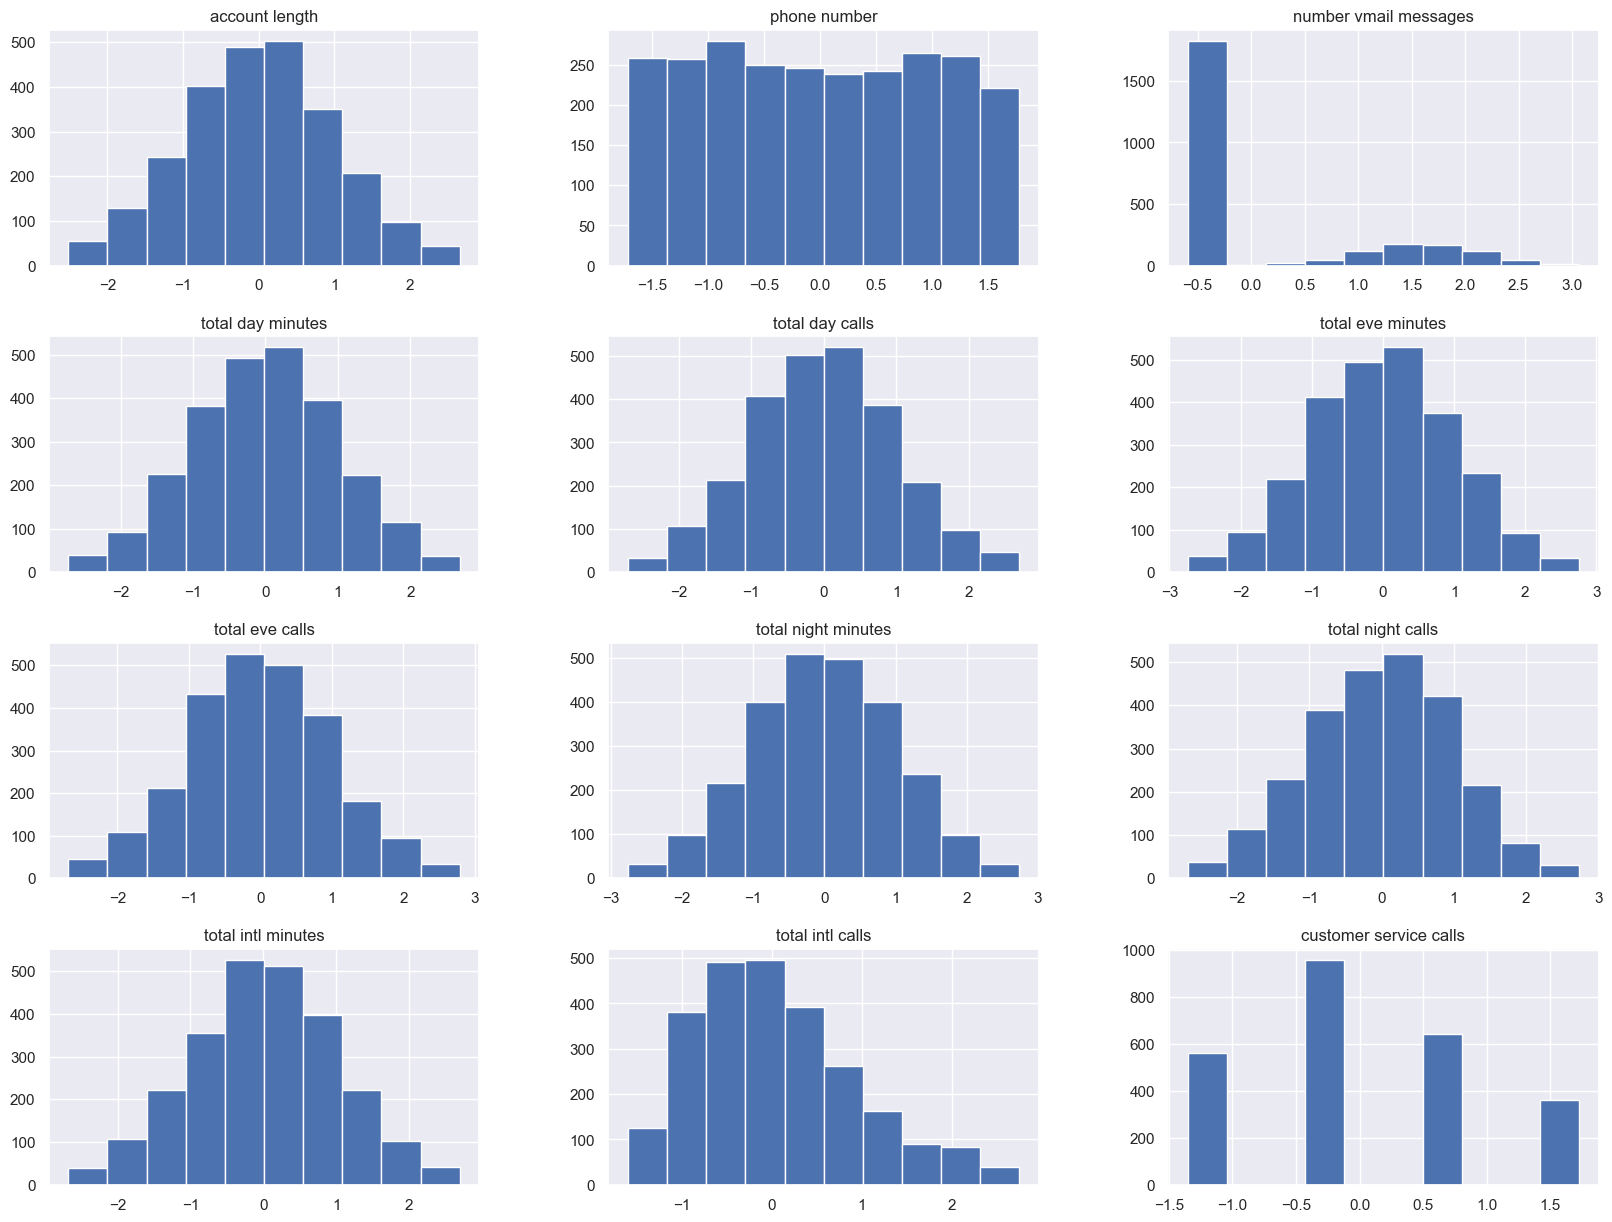

In [49]:
#Select only numeric columns
numeric_cols = syria_df3.select_dtypes(include=['float64', 'int64'])

#Create an instance of the StandardScaler
scaler = StandardScaler()

#Fit and transform the data
numeric_cols_normalized = scaler.fit_transform(numeric_cols)

#Create a DataFrame from the normalized data
numeric_cols_normalized_df = pd.DataFrame(numeric_cols_normalized, columns=numeric_cols.columns)

#Plot histograms of the normalized data
numeric_cols_normalized_df.hist(figsize=(20,15));

# Splitting the data 

In [51]:
# Checking for the percentage of Churners and non-churners.
syria_df3.churn.value_counts(normalize=True)*100

churn
False    92.307692
True      7.692308
Name: proportion, dtype: float64

There are approximately 92.30% are non-churners, while about 7.69% are churners.This class imbalance is handled using SMOTE (Synthetic Minority Over-sampling Technique ).

In [52]:
# Define the target variable
y = syria_df3['churn']

# Drop the target variable from the feature set
X = syria_df3.drop(['churn'], axis=1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2017, 15), (505, 15), (2017,), (505,))

In [53]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modelling

The target variable for this project is the binary variable 'Churn', indicating whether a customer has churned or not. Since the target variable is binary, a classification model is appropriate for this project. Some appropriate classification models that could be used for this project include logistic regression, decision tree, random forest, support vector machines (SVM), and neural networks.

# Baseline Model: Decision Tree Model

In [54]:
# Create an instance of the decision tree classifier and fit the model on the training data
clf = DecisionTreeClassifier(random_state=42)

In [55]:
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluating the model before tuning

Here we use the appropriate metrics such as accuracy,precision,recall, and F1-score

In [57]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training data
    y_train_pred = model.predict(X_train)

    # Predict on the test data
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # Calculate recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate F1-score
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print evaluation metrics
    print("Training Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        train_accuracy, train_precision, train_recall, train_f1
    ))
    print("Test Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        test_accuracy, test_precision, test_recall, test_f1
    ))

In [58]:
# Model evaluation
evaluate_model(clf, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9168, Precision: 0.4667, Recall: 0.5385, F1-score: 0.5000


In summary, this model has high accuracy but its precision, recall, and F1-score are relatively low. This could indicate that while the model is correct most of the time, it may be struggling to correctly identify positive instances (based on the low recall) and when it predicts an instance is positive, it’s correct only about half of the time (based on the low precision). The low F1-score suggests that there is room for improvement in balancing precision and recall.

# Tuning the model 

Here we determine the optimal hyperparameters for the decision tree model using techniques such as grid search.


In [59]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 7,10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
}

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_resampled,y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [60]:
# Use the best model found for predictions
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

# Evaluating the decison tree model after tuning

Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [61]:
# Evaluate tuned decision tree model
evaluate_model(best_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Training Data - Accuracy: 0.9997, Precision: 1.0000, Recall: 0.9995, F1-score: 0.9997
Test Data - Accuracy: 0.9030, Precision: 0.3958, Recall: 0.4872, F1-score: 0.4368


Confusion Matrix:
[[437  29]
 [ 20  19]]


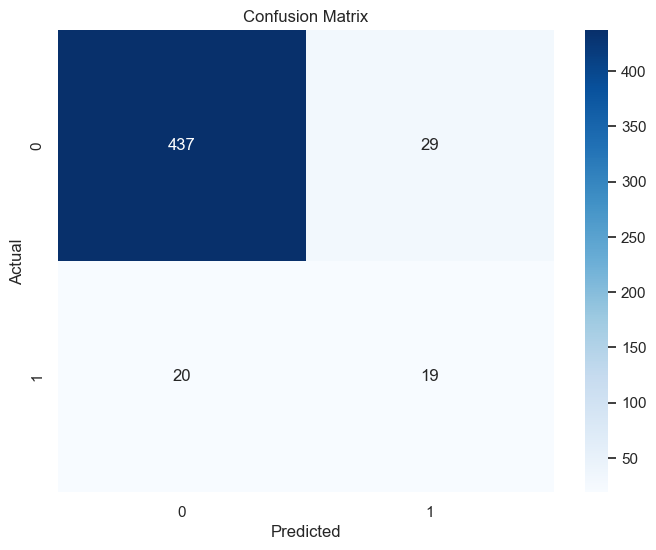

In [62]:
# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_predd)
print("Confusion Matrix:")
print(confusion_mat)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

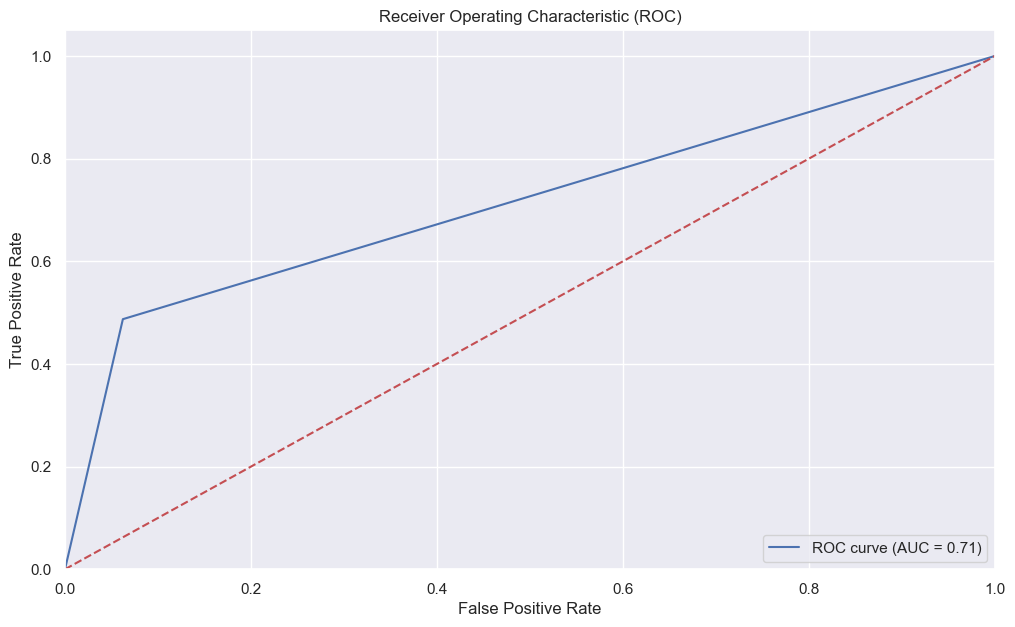

In [63]:
# Obtain predicted probabilities for the positive class
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)


# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Model Visualization

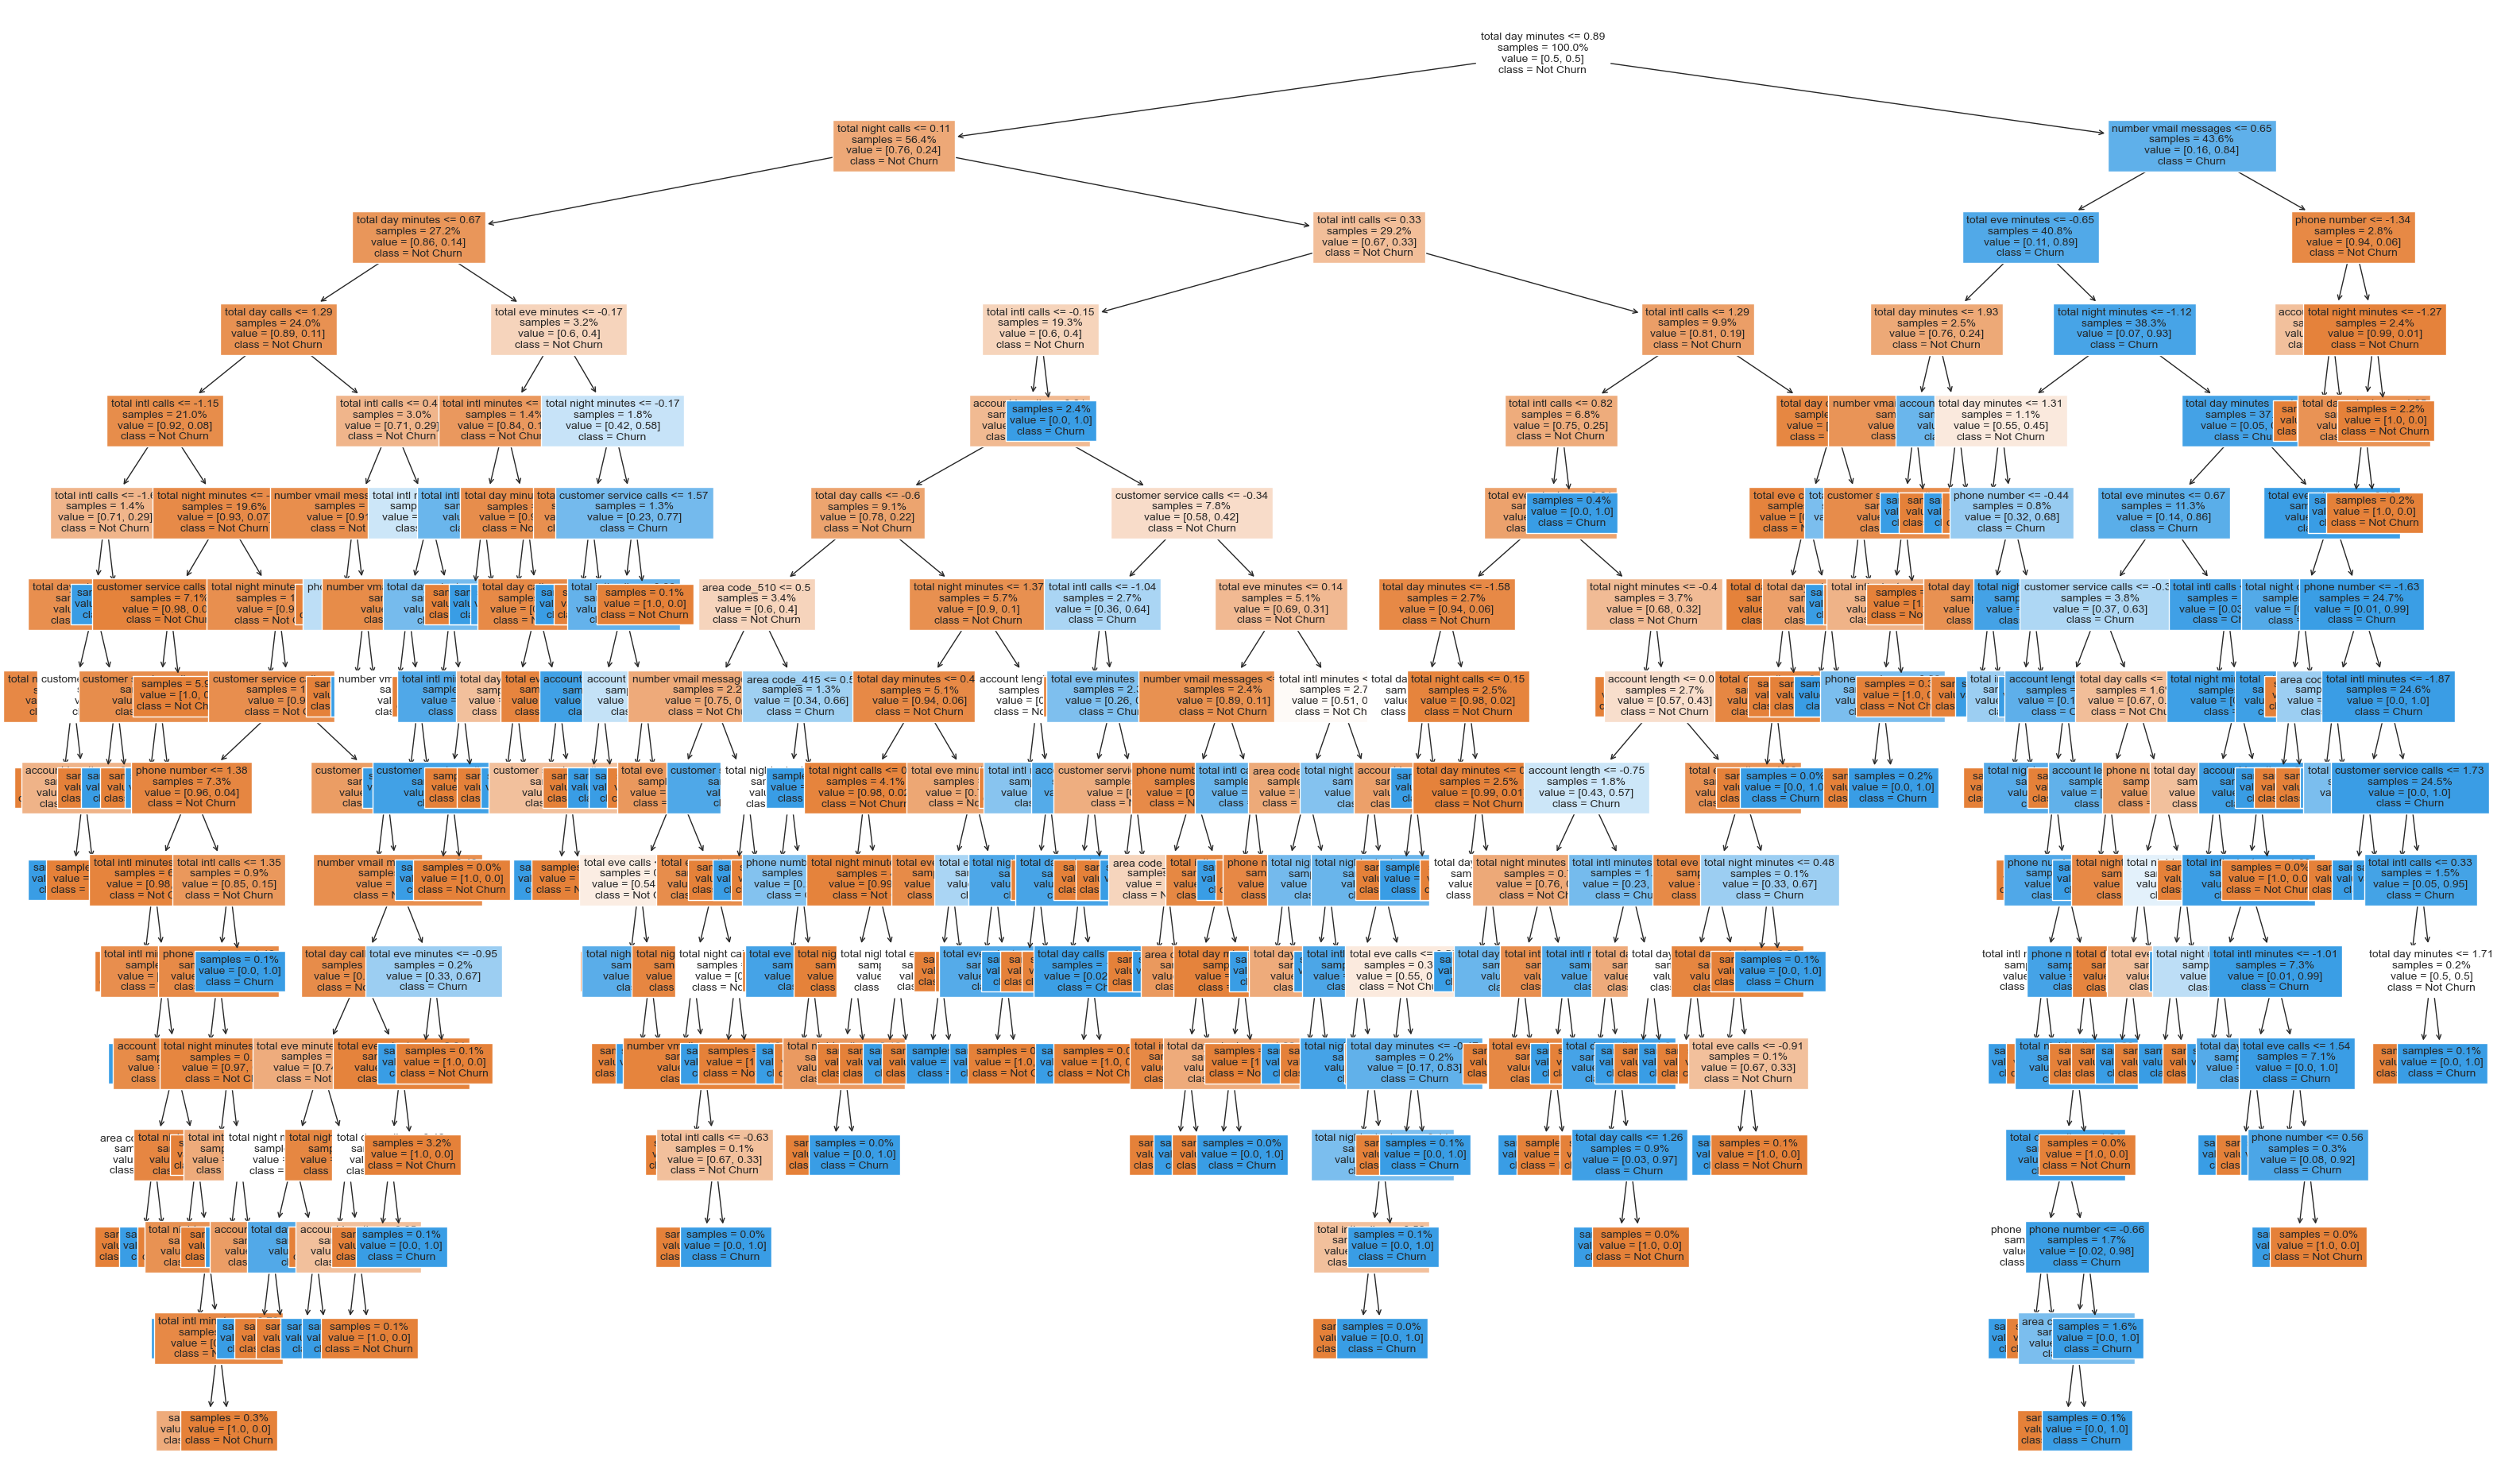

In [64]:
# Visualize the decision tree
plt.figure(figsize=(39, 24))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], fontsize=10, impurity=False, precision=2, proportion=True)
plt.show()

# Random Forest, Logistic regression and Gradient boost models

In [65]:
# Model selection and hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

# Model Performance Evaluation

In [66]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return as a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Dictionary to hold the results
results = {}

# For each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)
    
    # Store the results
    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.778218   0.229630  0.794872  0.356322
                    Train  0.807139   0.251064  0.761290  0.377600
Random Forest       Test   0.944554   0.641026  0.641026  0.641026
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.938614   0.586957  0.692308  0.635294
                    Train  0.962320   0.788321  0.696774  0.739726

# Random Forest Tuning

In [67]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

In [68]:
for model_name, model in models.items():
    if model_name == "Random Forest":
        # Create the GridSearchCV or RandomizedSearchCV instance
        grid_search = GridSearchCV(model, rf_param_grid, cv=5, n_jobs=-1)
        # Fit the model on the resampled data with hyperparameter search
        grid_search.fit(X_train_resampled, y_train_resampled)
        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        # Use the best hyperparameters for the final model
        model = grid_search.best_estimator_
    else:
        # For other models, you can follow similar steps with their respective hyperparameter grid.
        model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [69]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

# Now you can use this best_rf_model for further training and prediction.
best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

# Evaluating the tuned Random Forest

In [70]:
# Fit the RandomForestClassifier with the best hyperparameters on the training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training data
y_train_pred = best_rf_model.predict(X_train_resampled)

# Make predictions on the test data
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on the training set
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9446, Precision: 1.0000, Recall: 0.2821, F1-score: 0.4400


The model achieved an accuracy of 94.5% on the test set. The F1-score is high, indicating a good balance between precision and recall.

# Logistic Regression Tuning

In [71]:
# Define the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],          # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'saga']   # Optimization algorithm
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, lr_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

# Use the best hyperparameters for the final Logistic Regression model
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_logistic_regression_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_logistic_regression_model, X_train, y_train, X_test, y_test)

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Training Data - Accuracy: 0.9494, Precision: 0.9818, Recall: 0.3484, F1-score: 0.5143
Test Data - Accuracy: 0.9465, Precision: 1.0000, Recall: 0.3077, F1-score: 0.4706


The model achieved an accuracy of 94.7% on the test set, with better performance in predicting non-churners (class 0) compared to churners (class 1).

# Gradient Boost Tuning

In [74]:
# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size at each boosting iteration
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],              # Fraction of samples used for fitting the trees
}

# Create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search_gb = GridSearchCV(gradient_boosting, gb_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Use the best hyperparameters for the final Gradient Boosting model
best_gradient_boosting_model = grid_search_gb.best_estimator_

# Make predictions on the test set
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_gradient_boosting_model, X_train, y_train, X_test, y_test)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9525, Precision: 0.7778, Recall: 0.5385, F1-score: 0.6364


The Gradient Boosting model achieved an impressive 95.25% accuracy on the test set, demonstrating its excellent predictive capability for both churners and non-churners. With a high F1-score and precision, it effectively identifies churners (class 1) with a recall of 53.9% and precision of 77.8%, proving its effectiveness in predicting customer churn in this scenario.

# Model Evaluation

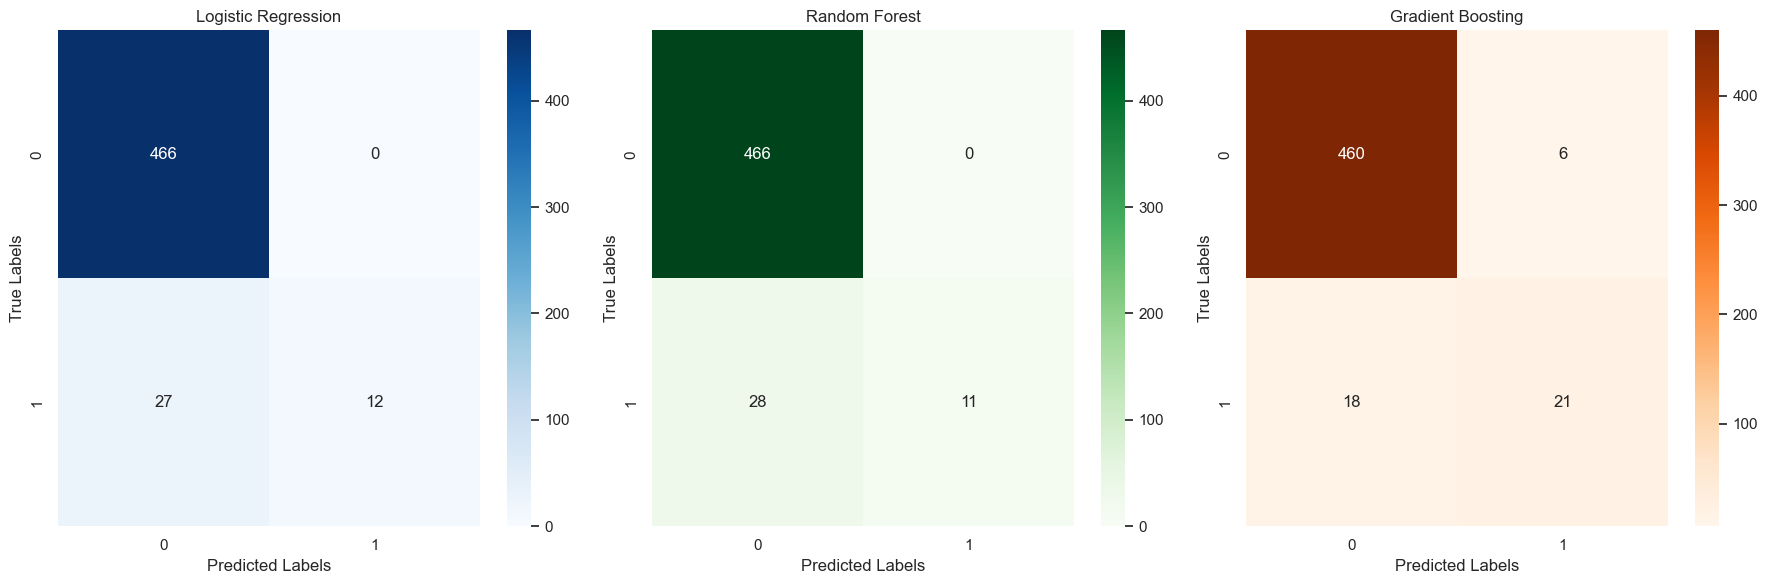

In [75]:
# Create subplots for all three confusion matrices
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# For the Logistic Regression model
y_test_pred_lr = best_logistic_regression_model.predict(X_test)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# For the Random Forest model
y_test_pred_rf = best_rf_model.predict(X_test)  # Replace 'best_random_forest_model' with 'best_rf_model'
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

# For the Gradient Boosting model
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Oranges', ax=axs[2])
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Predicted Labels")
axs[2].set_ylabel("True Labels")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

# A plot of AUC nad ROC

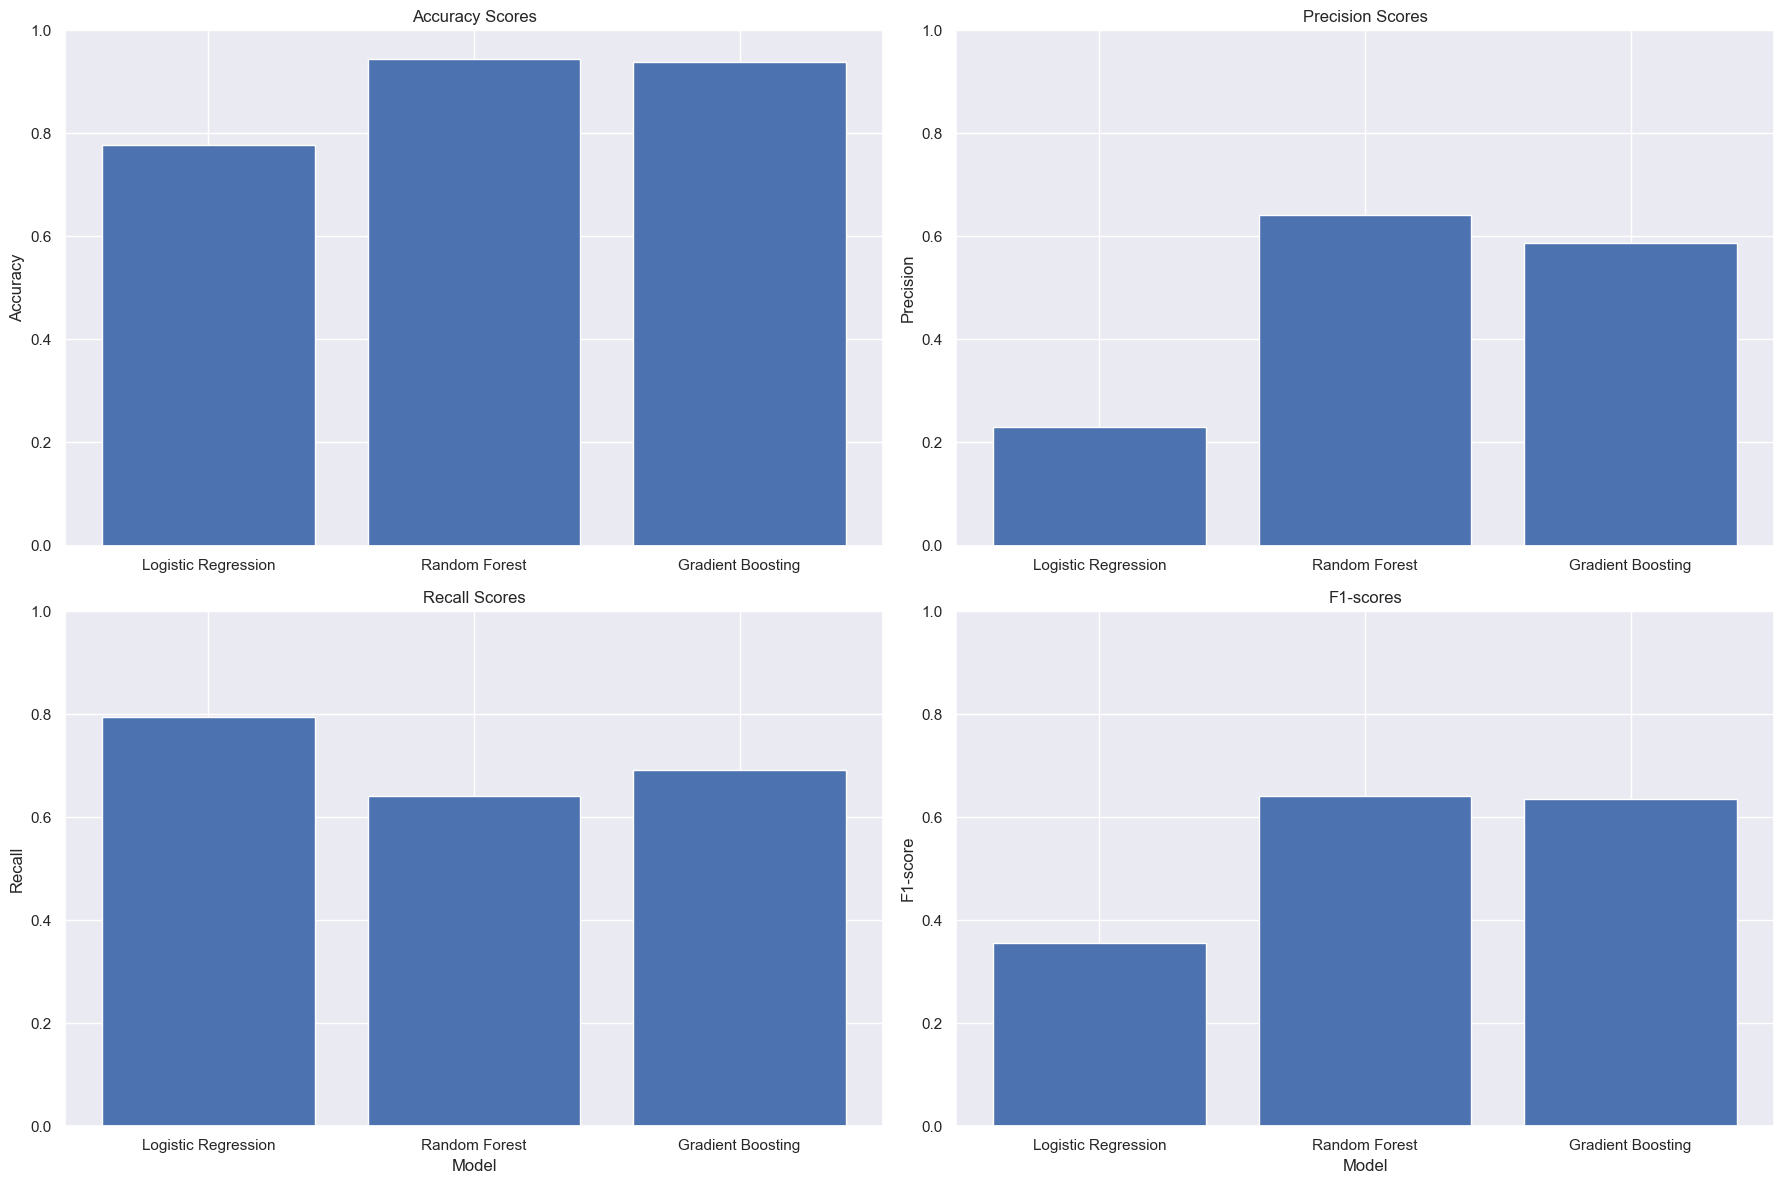

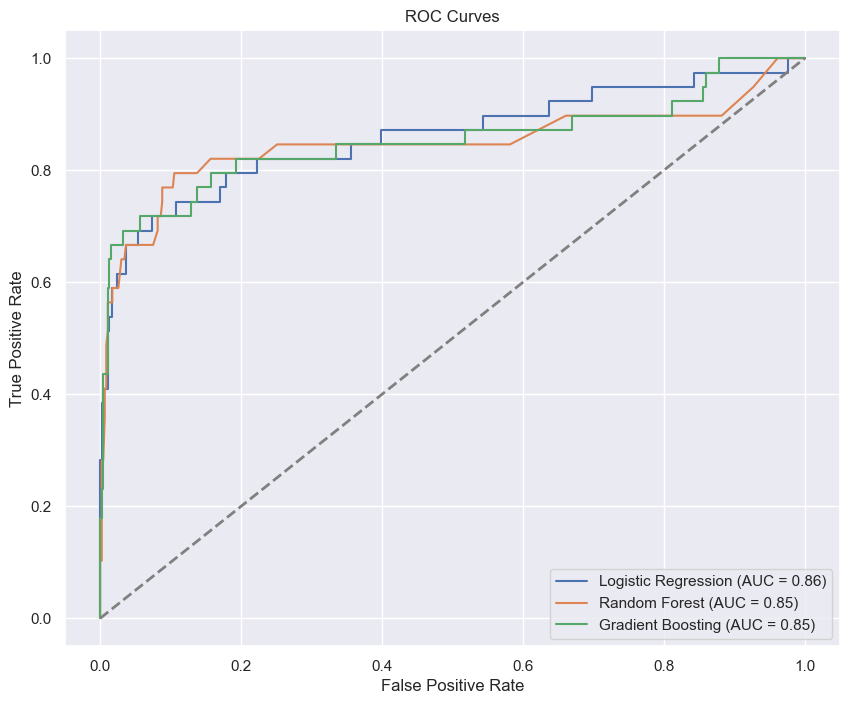

In [76]:
# Initialize dictionaries to store the evaluation metrics for each model
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Assuming "models" is a dictionary of your tuned models (Gradient Boosting, Random Forest, and Logistic Regression)
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionaries
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1

# Create subplots for the bar plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Visualize the evaluation metrics using bar plots
axs[0, 0].bar(accuracy_scores.keys(), accuracy_scores.values())
axs[0, 0].set_ylim(0, 1.0)
axs[0, 0].set_title("Accuracy Scores")
axs[0, 0].set_ylabel("Accuracy")

axs[0, 1].bar(precision_scores.keys(), precision_scores.values())
axs[0, 1].set_ylim(0, 1.0)
axs[0, 1].set_title("Precision Scores")
axs[0, 1].set_ylabel("Precision")

axs[1, 0].bar(recall_scores.keys(), recall_scores.values())
axs[1, 0].set_ylim(0, 1.0)
axs[1, 0].set_title("Recall Scores")
axs[1, 0].set_xlabel("Model")
axs[1, 0].set_ylabel("Recall")

axs[1, 1].bar(f1_scores.keys(), f1_scores.values())
axs[1, 1].set_ylim(0, 1.0)
axs[1, 1].set_title("F1-scores")
axs[1, 1].set_xlabel("Model")
axs[1, 1].set_ylabel("F1-score")

plt.tight_layout()
plt.show()

# Create a new figure for the ROC curves
plt.figure(figsize=(10, 8))

# Create ROC curves for each model
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()

We see thats there is an increase in all of our performace metrics after tuning indicating that our model is working well.

The accuracy of the Gradient Boost model 0.9525 indicates that our model is very good in prediction and results can be relied upon


# Feature Selection

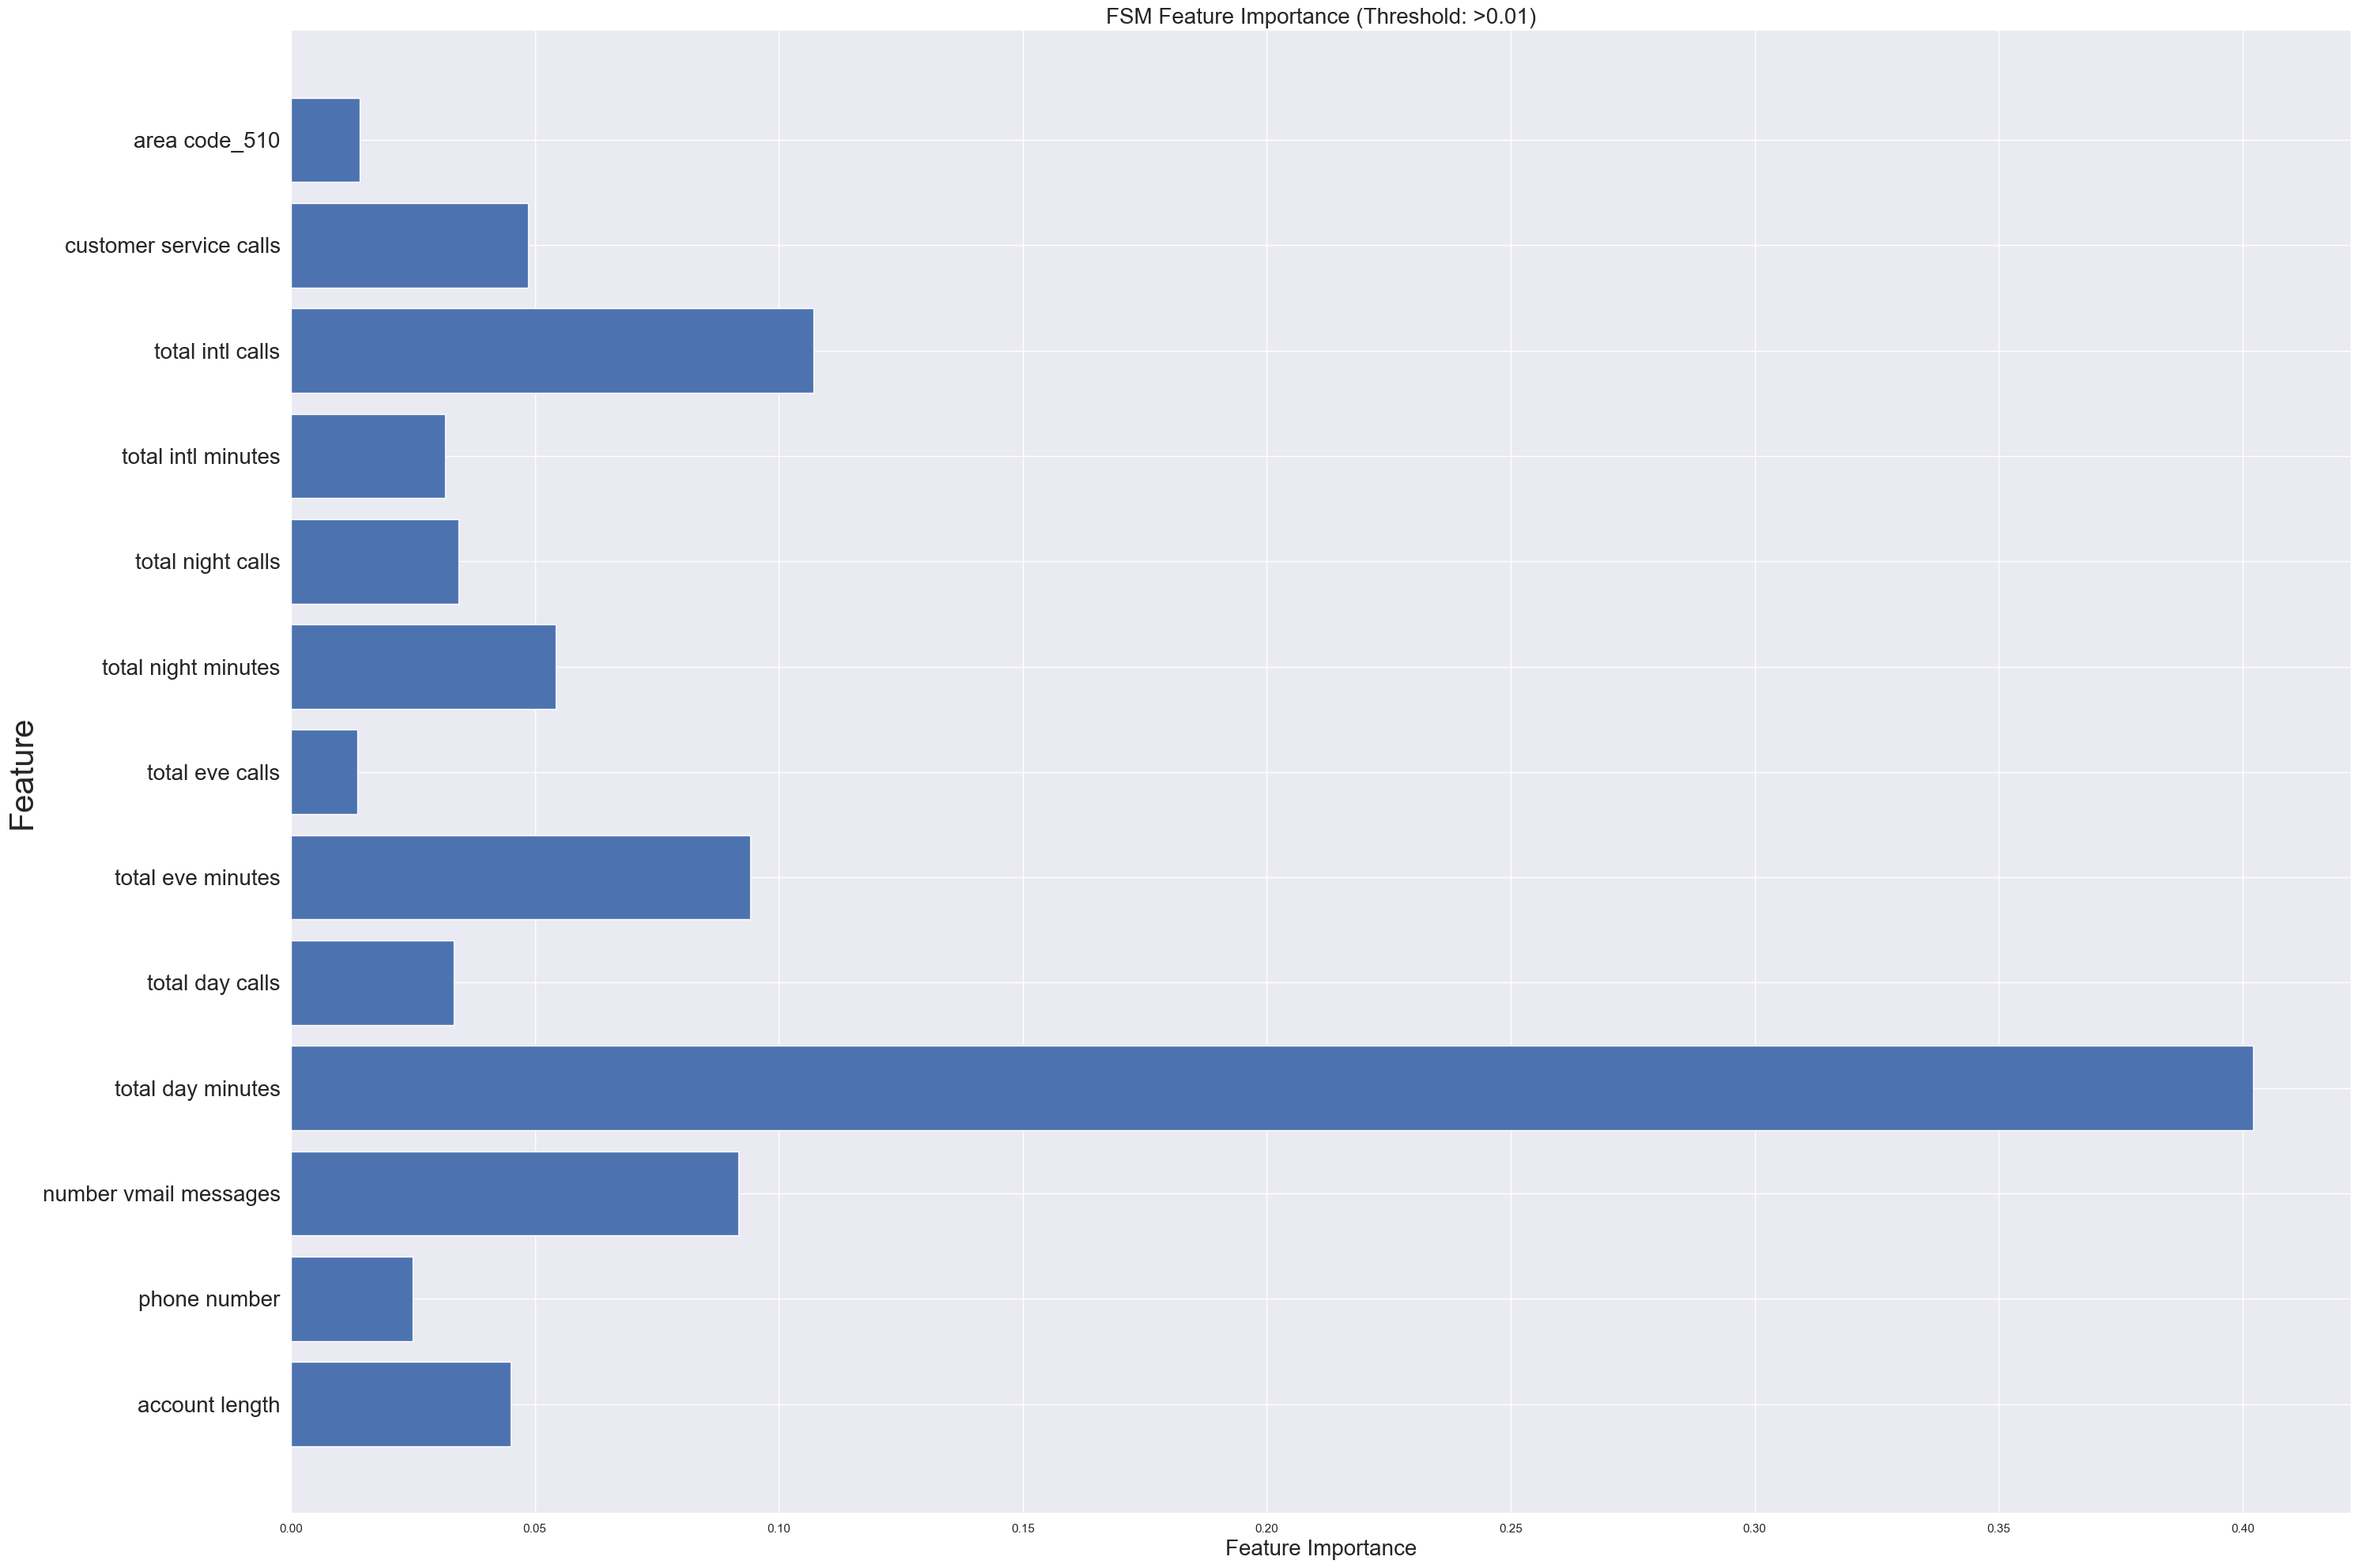

In [79]:
feature_importances = best_clf.feature_importances_
threshold = 0.01  # Set the threshold for including features with importance

# Filter the features based on the importance threshold
important_features = [feature for feature, importance in zip(X.columns, best_clf.feature_importances_) if importance > threshold]

# Create a subset of feature importances for the important features
importances_subset = [importance for importance in best_clf.feature_importances_ if importance > threshold]

plt.figure(figsize=(30, 20))
plt.barh(range(len(important_features)), importances_subset)
plt.yticks(range(len(important_features)), important_features, fontsize=20)
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature', fontsize=30)
plt.title('FSM Feature Importance (Threshold: >{})'.format(threshold), fontsize=20)
plt.tight_layout()
plt.show()

We can see from this feature importance graph that there are several features that the model is weighing more heavily:

Total day minutes,
Total intl calls,
Total Eve minutes,
Number of Vmail messeges,
Account length.

# Conclusion

Model Performance:

The churn prediction models seem to have reasonably good performance based on the metrics used (accuracy, precision, recall, and F1-score), with Gradient Boosting performing the best with an Accuracy of 95.25% and Recall of 53.8% after tuning.
The model tuning for the Decision Tree model led to an improvement in accuracy and precision but a decrease in recall. This indicates a trade-off between correctly predicting positive instances and capturing all actual positive instances.

Key Features:

'international_plan', 'total_charge', and 'customer_service_calls' emerged as the most influential features for predicting churn. This suggests that customers with an international plan, those who have a high total charge, and those who have made more customer service calls are more likely to churn

# Recommendations

Based on our findings, we recommend the following:

To answer our objective question:

How can we assist SyriaTel in optimizing retention strategies and resource allocation to minimize financial losses associated with customer churn, ultimately improving the company's bottom line and fostering customer loyalty?

Revise International Plan Pricing: Adjust the pricing structure of the International Plan to align with the standard plan, as the current charges are identical.

Enhance Communication Channels: Establish proactive communication strategies to engage customers and address their needs promptly.

Implement Regular Feedback Mechanisms: Frequently solicit customer feedback to understand their experiences and expectations better.

Introduce Periodic Customer Incentives: Deploy regular promotional offers to enhance customer loyalty and retention.

Focus on High-Churn States: Pay special attention to customers in states with high churn rates and devise strategies to address their specific issues.

Prioritize High-Value Customers: Develop strategies to deepen relationships with the most loyal and profitable customers.

Ensure Regular Server Maintenance: Conduct routine server maintenance to ensure optimal performance and minimize downtime.

Address Network Connectivity Issues: Invest in infrastructure improvements to resolve any existing network connectivity problems.

Develop a New Customer Onboarding Roadmap: Create a comprehensive roadmap for new customers to ensure a smooth and positive onboarding experience.

Perform Churn Analysis: Conduct regular churn analysis to identify patterns and devise effective retention strategies.

Maintain Competitive Edge: Continually monitor market trends and competitor activities to ensure the company’s offerings remain competitive.

# To be studied further

Further studies on telecom churn rate analysis could focus on the following areas:

Advanced Analytics: Implementing a comprehensive, analytics-based approach to base management can help telecom companies reduce their churn by as much as 15%. This involves developing a comprehensive view of the customer, using cutting-edge analytical techniques, and identifying variables that contribute to customer churn.

Churn Prediction Models: Building predictive models to identify customers at high risk of churn is another area of study. These models can use various machine learning algorithms and take into account numerous features such as usage patterns, customer complaints, payment history, and more.

Customer Segmentation: Understanding the different segments of customers and how they behave can help in predicting and reducing churn. This involves studying the demographics, usage patterns, and preferences of different customer segments.

Impact of Pricing and Services: Studying how different pricing models, service quality, and additional features impact churn rate can provide insights into what customers value and what might cause them to switch providers.

Competitive Analysis: Analyzing the churn rate in relation to the competition can help understand how competitive dynamics influence customer retention.

Customer Feedback Analysis: Analyzing customer feedback can help identify common reasons for churn and areas for improvement.

Prepaid vs Postpaid Services: The churn rate could be significantly different for prepaid and postpaid services. Studying these differences can provide insights into how to reduce churn for each type of service.